# 10 Deep Learning

## Single Layer Neural Networks
* A neural network takes an input vector of $p$ variables $X=(X_1,X_2,\ldots,X_p)$ and builds a nonlinear function $f(X)$ to predict the response $Y$, where nonlinear prediction models are built using one of the methods like trees, boosting and generalized additive models.
* The distinguishing thing from above models is the *structure* of the  model - typically, single neural networks (in the terminology of neural networks), the features $X=(X_1,X_2,\ldots,X_p)$ make up the units in the *input layer* ;  while the arrows indicate that each of the inputs from the input layer feeds into each of the $K$ no.of. *hidden input layer units* and the neural networks take the form: $f(X)=\beta_0+ \sum_{k=1}^{K}\beta_{k}h_{k}(X) = \beta_0+\sum_{k=1}^{K}\beta_{k} g\left( w_{k0}+\sum_{j=1}^{p}w_{kj}X_{j}\right).$
* It is built in 2 steps:
  * First, the $K$ no.of. *activations* in the hidden layer are computed as functions of the input features $X=(X_1,X_2,\ldots,X_p)$: let the activations be denoted as $A_k$ where $k=1,\ldots,K$, then $A_k=h_k(X)= g\left( w_{k0}+\sum_{j=1}^{p}w_{kj}X_{j}\right)$, where $g(z)$ is a *nonlinear activation function* that is specifed in advance - Think of each $A_k$ function as a diferent transformation $h_k(X)$ of the original features!
  * Next, these $K$ activations from the hidden layer then feed into the output layer, resulting in a linear regression model in the $K$ activations: $f(X)=\beta_0+ \sum_{k=1}^{K}\beta_{k}A_{k}$ while all the parameters such as $\beta_0,\ldots,\beta_k$ and $w_{10},\ldots,w_{kp}$ needed to be estimated from data.
* Earlier in neural networks, the ***sigmoid activation function*** was favored (same function used in logistic regression - to convert a linear function into probabilities between zero and one) is of the form $g(z)=\frac{e^z}{(1+e^z)}=\frac{1}{(1+e^{-z})}$.
* In modern neural networks, ReLU (*rectifed linear unit*) activation function is the preferred choice and it takes the form: $g(z)=(z)_{+}=\begin {cases}0,& \text{if}\space z<0\\z,& \text{otherwise.}\end{cases}$.
* One advantage of ReLU over sigmoid, is that ReLU can be computed and stored more efciently than sigmoid.
* Although it thresholds at zero, because we apply it to a linear function $A_k=h_k(X)= g\left( w_{k0}+\sum_{j=1}^{p}w_{kj}X_{j}\right)$, the constant term $w_{k0}$ will shift this infection point.
* **Neural network working in words**: the model derives $K$ new features by computing $K$ diferent linear combinations of $X$, and then squashes each through an activation function $g(.)$ to transform it, and the final model is linear in these derived variables.
* The nonlinearity in the activation function $g(.)$ is essential - a nonlinear activation function allows the model to capture complex nonlinearities and interaction efects.
* Fitting a neural network requires estimating the unknown parameters $(\beta_0,\ldots,\beta_k,w_{k0},\ldots,w_{kj})$ and for quantitative response, typically squared-error loss is used and the above parameters are chosen, such that to  $\text{minimize}\{\sum_{i=1}^{n}\left(y_{i}-{f(x_{i})}\right)^2\}$.

![Simple_Neural_Network](http://localhost:8888/files/Imgs/Simple%20Neural%20Network.png?_xsrf=2%7Cfea61eb1%7C427b326149bd61693796302155bdfea8%7C1752234369)

## Multilayer Neural Networks
* Have more than one hidden layer, and often many units per layer.
* More generally, in multi-task learning one can predict diferent responses simultaneously with a single network; they all have a say in the formation of the hidden layers.
* The loss function used for training the network is tailored for the specific used case!
* So, from the picture, let us assume, (in general notations) there are $p$ variables such that $(X_1,\ldots,X_p)$ and let $K_k$ be the number of hidden layers such that $k=1,\ldots,K$, then we can denote the first hidden layer (1) with the form $A_{k}^{(1)}=h_{k}^{(1)} (X)=g\left(w_{k0}^{(1)}+\sum_{j=1}^{p}w_{kj}^{(1)}X_j\right)$ and thus second hidden layer (2) with the form $A_{l}^{(2)}=h_{l}^{(2)}(X)=g\left(w_{l0}^{(2)}+\sum_{k=1}^{K_1}w_{lk}^{(2)}A_{k}^{(1)}\right)$ for $k=1,\ldots,K_1$ and $l=1,\ldots,K_2$
* Thus, through a chain of transformations, the network is able to build up fairly complex transformations of X that ultimately feed into the output layer as features.
* So the notation $\textbf{W}_1$ from the picture represents the entire matrix of weights that feed from the input layer to the first hidden layer $L_1$ which is $1+p$ because we must account for the *intercept* or *bias* term $w_{k0}$ (Not to be confused with *bias-variance*).
* Each element $A_{k}^{(1)}$ feeds to the second hidden layer $L_2$ via the matrix of weights $\textbf{W}_2$ of dimension: $A_{K_1}^{(1)} \times A_{K_2}^{(2)}$ where $K_1$,$K_2$ are the no.of. variables in hidden layers (1) and (2) respectively. Similary we can use this step for $K$ no.of. hidden layers like: $A_{K_1}^{(1)} \times A_{K_2}^{(2)} \times \ldots \times A_{K_k}^{(k)}$ for $k=1,\ldots,K$.
* We now get to the output layer, which contains $m$ no.of. responses, instead of 1 discussed in simple neural network:
  * The first step is to compute $m$ diferent linear models to our single model, given as $Z_m= \beta_{m0}+\sum_{l=1}^{{K_2}}\beta_{ml}A_{l}^{(2)}$ (***Note***: we assume here that, the no.of. hidden layer here stops at k=2, so we used `(2)`. In practice, this step is to be continued till the last hidden layer to the output layer) and the matrix $\textbf{B}$ stores all these weights i.e. $(1+K_k) \times m$.
  * Now, if all these $m$ are all separate quantitative responses, we would simply set each $f_m(X)=Z_m$ and be done.
  * If we would like our estimates to represent class probabilities $f_m(X)=P(Y=m|X)$ (just like in multinomial logistic regression),we use the special *softmax* activation function $f_m(X)=P(Y=m|X)=\frac{e^{Z_m}}{\sum_{l=0}^{m}e^{Z_l}}$ for $m=0,1,\ldots,m$.
  *  Even though the goal is to build a classifer, our model actually estimates a probability for each of the $m$ classes and the classifer then assigns the image to the class with the highest probability.
* To train this network, **for the qualitative response**, we calculate the coefficient estimates that <u>minimize the negative multinomial log-likelihood</u> a.k.a *cross-entropy* given as $\text{minimize}\space \left\{-\sum_{i=1}^{n}\sum_{m'=0}^{m}y_{im'}log(f_m'(x_i))\right\}$.
* If the response were **quantitative**, we would instead minimize squared-error loss!
* Adding the number of coefficients in $\textbf{W}_1$,$\textbf{W}_2$,$\textbf{B}$  seems a lot more than times the number needed for multinomial logistic regression which is $(1+p) \times m$.
* To avoid overfitting, some regularization like: *ridge regularization* (wchich is similar to ridge regression) or *dropout regularization* may be needed.
![Multi-layer Neural network](http://localhost:8888/files/Imgs/Multi%20Neural%20Network.png?_xsrf=2%7Cfea61eb1%7C427b326149bd61693796302155bdfea8%7C1752234369)

## Convolutional Neural Networks CNNs
* Each image has a resolution measured in pixels (say 1024*1024) with three eight-bit numbers per pixel representing R,G,B.
* The numbers for each image are organized in a three-dimensional array called a *feature map*, in which $1^{st}$ and $2^{nd}$ axes are *spatial* co-ordinates and the $3^{rd}$ is the *channel* (The term *channel* is taken from the *signal-processing* literature. Each channel is a distinct source of information.) axis, which represents colors in RGB.
* A special family of *convolutional neural networks* (CNNs) has evolved for classifying images, and also has shown spectacular success on a wide range of problems.
* CNNs mimic to some degree how humans classify images, by recognizing specifc features or patterns anywhere in the image that distinguish each particular object class.
* The network first identifes *low-level features* (such as small edges, patches of colors etc.,) in the input image, and these low-level features are then combined to form *higher-level features* (such as the parts of ears, eyes etc;).
* Eventually, the presence or absence of these higher-level features contributes to the probability of any given output class.
* CNNs uses two specialized types of hidden layers, called *convolution layers* and *pooling layers*, to build up the above mentioned hierarchy.
* *Convolution layers* <u>search for instances of small patterns in the image</u>, whereas *pooling layers* <u>downsample these to select a prominent subset</u>.
*  To achieve state-of-the-art results, contemporary neural network architectures make use of many convolution and pooling layers.
### Convolution Layers
* It is made up of a large number of *convolution filters*,each of which is a template that determines whether a particular local feature is present in an image.
* Convolution filters relies on operation, called a *convolution* which basically amounts to repeatedly multiplying matrix elements and then adding the results.<br>
* Sample convolution operation between 2 matrices $4\times 3$ and $2\times 2$: <br>Let,<br> $\text{Original Picture}= \begin{bmatrix}a&b&c\\d&e&f\\g&h&i\\j&k&l \end{bmatrix}$ and $\text{Convolution Filter}= \begin{bmatrix}\alpha & \beta\\\gamma & \delta\end{bmatrix}$ then when we convolve the image with the filter, we get $\text{Convolved Image}= \begin{bmatrix}a\alpha+b\beta+d\gamma+e\delta & b\alpha+c\beta+e\gamma+f\delta \\ d\alpha+e\beta+g\gamma+h\delta & e\alpha+f\beta+h\gamma+i\delta \\ g\alpha+h\beta+j\gamma+k\delta & h\alpha+i\beta+k\gamma+l\delta\end{bmatrix}$
* The convolution flter is applied to every $2\times 2$ submatrix of the original image in order to obtain the convolved image.
* If a $2\times 2$ submatrix of the original image resembles the convolution flter, then it will have a *large value* in the convolved image; otherwise, it will have a *small value*.
* Thus, the convolved image highlights regions of the original image that resemble the convolution filter.
* In general, convolution filters are small $\mathcal{l}_1 \times \mathcal{l}_2$ arrays, with $\mathcal{l}_1$ and $\mathcal{l}_2$ are small positive integers that are not necessarily equal.
* In a convolution layer, we use a whole bank of flters to pick out a variety of diferently-oriented edges and shapes in the image.
* Using predefned filters in this way is standard practice in image processing. By contrast, with CNNs the flters are *learned* for the specifc classifcation task.
* We can think of the filter weights as the parameters going from an input layer to a hidden layer, with one hidden unit for each pixel in the convolved image.
* Though the parameters are highly structured and constrained, they operate on localized patches in the input image , and the same weights in a given flter are reused for all possible patches in the image (This used to be called *weight sharing* in the early years of neural networks).
* For, the input image in color, it has 3 channels represented by a three-dimensional feature map where each channel is a two dimensional feature map — one for each R,G,B.
* A single convolution flter will also have three channels, one per color, each of dimension 3×3, with potentially diferent filter weights.
* The results of the three convolutions are summed to form a two-dimensional output feature map, but in this step, color information has been used, and is not passed on to subsequent layers except through its role in the convolution.
* If we use K diferent convolution flters at this frst hidden layer, we get K two-dimensional output feature maps, treated as a single three-dimensional feature map.
* We view each of the K output feature maps as a separate channel of information, so now we have K channels in contrast to the three color channels of the original input feature map.
* The three-dimensional feature map is just like the activations in a hidden layer of a simple neural network, except organized and produced in a spatially structured way.
* We then typically apply the ReLU activation function to the convolved image and this step is sometimes viewed as a separate layer in the CNNs, in which case it is referred to as a *detector layer*.
### Pooling Layers
* This layer provides a way to condense a large image into a smaller summary image.
* One of the ways to perform pooling is the *max pooling* operation, which summarizes each non-overlapping 2 × 2 block of pixels in an image using the maximum value in the block which reduces the size of the image by a factor of two in each direction, and it also provides some *location invariance* (i.e., if there is a large value in one of the four pixels in the block, the whole block registers as a large value in the reduced image).
* Sample max pooling operation: $\text{maxpool}\begin{bmatrix}1&2&5&3\\3&0&1&2\\2&1&3&4\\1&1&2&0\end{bmatrix}$ searches large value in one of the four pixels in the (non-overlapping) block, i.e., $\begin{bmatrix}1&2\\3&0\end{bmatrix}$ which is 3; $\begin{bmatrix}5&3\\1&2\end{bmatrix}$ which is 5; $\begin{bmatrix}2&1\\1&1\end{bmatrix}$ which is 2; $\begin{bmatrix}3&4\\0&2\end{bmatrix}$ which is 4 and thus finally $\begin{bmatrix}1&2&5&3\\3&0&1&2\\2&1&3&4\\1&1&2&0\end{bmatrix} \rightarrow \begin{bmatrix}3&5\\2&4\end{bmatrix}$.
### Architecture of a Convolutional Neural Network
* In a single convolution layer, each filter produces a new two-dimensional feature map and number of convolution filters in a convolution layer is akin to number of units at a particular hidden layer in a fully-connected neural network which also defnes the number of channels in the resulting three dimensional feature map. Then a pooling layer, which reduces the frst two dimensions of each three-dimensional feature map.
* Deep CNNs have many such layers: input layer, and each convolution filter produces a new channel at the first hidden layer, after this first round of convolutions, we now have a new “image”; a feature map with considerably more channels than the three color input channels, followed by a max-pool layer (reduces the size of the feature map in each channel by a factor of four: two in each dimension).
* This convolve-then-pool sequence is now repeated for the next two layers.
* Each subsequent convolve layer (similar to the frst) takes as input, the three-dimensional feature map from the previous layer and treats it like a single multi-channel image.
* Since the channel feature maps are reduced in size after each pool layer, we usually increase the number of flters in the next convolve layer to compensate.
* We repeat several convolve layers before a pool layer, which efectively increases the dimension of the filter.
* The above operations are repeated until the pooling has reduced each channel feature map down to few pixels in each dimension to the point, where three-dimensional feature maps are *fattened*.
* The pixels (treated as separate units) are fed into one or more fully-connected layers before reaching the output layer (which is a softmax activation).
* Many tuning parameters to be selected in constructing CNNs such as  number, nature, and sizes of each layer.
* *Dropout learning* can be used at each layer, as well as lasso or ridge regularization.
![Deep CNNs](http://localhost:8888/files/Imgs/DeepCNN.png?_xsrf=2%7Cfea61eb1%7C427b326149bd61693796302155bdfea8%7C1752234369)
### Data Augmentation
* It is an additional important trick.
* Each training image is replicated many times, with each replicate randomly distorted in a natural way such that human recognition is unafected.
* Typical distortions: zoom, horizontal and vertical shift, shear, small rotations, horizontal fips etc.,
* In this is a way of increasing the training set,with somewhat diferent examples, and thus protects against overftting.
* The stochastic gradient descent algorithms for ftting deep learning models works hand-in glove with augmentation.
### Results Using a Pretrained Classifer
* Much of the work in ftting a CNN is in learning the convolution filters at the hidden layers; these are the coefcients of a CNN.
* One can use these pretrained hidden layers for new problems with much smaller training sets (a process referred to as *weight freezing*), and just train the last few layers of the network, which requires much less data.

## Document Classifcation
* Predicting attributes of documents.
* Documents are prone to have diferent length, include slang or non-words, have spelling errors, etc.
* *Featurize*(ing) such a document, is the modern parlance for defning a set of predictors.
* The simplest and most common featurization is the *bag-of-words* model and we score each document for the presence or absence of each of the words in a language dictionary.
* So for a language dictionary of $M$ words, we create a binary feature vector of length $M$ and a score `1` for every present, and `0`otherwise. Being a very wide feature vector, so we limit the dictionary, say 10K of the most frequently occurring words in the training corpus.
* Because most of the values are the same i.e., 0 we call such a matrix sparse, and it can be stored efficiently in *sparse matrix format* i.e., rather than store the whole matrix, we can store instead the location and values for the nonzero entries ; since the nonzero entries are all 1.
* We split of a validation set from the training observations (for model tuning), and fit two model sequences: lasso logistic regression and  two-class neural network with two hidden layers, each with 16 ReLU units.
* The lasso sequence is indexed by the regularization parameter λ, while the neural-net sequence is indexed by the number of gradient-descent iterations used in the ftting, as measured by training epochs or passes through the training set.
* Since the two-class neural network amounts to a nonlinear logistic regression model, we can see that $log\left(\frac{P(Y=1|X)}{P(Y=0|X)}\right)=Z_{1}-Z_{0}= (\beta_{10}-\beta_{00})+\sum_{l=1}^{K_2}\left(\beta_{1l}-\beta_{0l}\right)A_{l}^{(2)}$ - this shows the redundancy in the softmax function; for $K$ classes we really only need to estimate $K−1$ sets of coefficients! we , as ML practioners see *accuracy*(fraction correct) rather than classifcation error (fraction incorrect).
* The bag-of-words model summarizes a document by the words present, and ignores their context.
* The *bag-of-n-grams* model can be one of the useful models in taking the context into account.

## Recurrent Neural Networks RNNs
* In a *recurrent neural network* (RNN), the input object (say a document) $X$ is a *sequence* and this object can be represented as a sequence of $L$ entities (say words) such that $X=\{X_1,X_2,\ldots,X_l\}$.
* The order of the words, and closeness of certain words in a sentence, convey semantic meaning and thus RNNs are designed to accommodate and take advantage of the sequential nature of such input objects (like that of CNNs accommodate the spatial structure of image inputs).
*  The output Y can also be a sequence (in the case on natural language processing) or scalar (binary sentiment label of a movie review document).
* The basic structure of a RNN includes an input $X=\{X_1,X_2,\ldots,X_l\}$, a simple output $Y$ and a hidden layer sequences $\text{\{A\}}_{1}^{L}=\{A_1,A_2,\ldots,A_l\}$ such that each $X_l$ is a vector (in our document example, it may represent a one-hot encoding for the $l$th word based on the language dictionary for the corpus).
* As sequentially processed one vector at a time, the network updates the activations $A_l$ in in the hidden layer, taking as input the vector $X_l$ and the activation vector $A_{l-1}$ from the previous step in the sequence and  each $A_l$ feeds into the output layer and produces a prediction $O_l$ for $Y$; while the last $O_L$of these, is the most relevant.
* Now suppose each vector $X_l$ of the input sequence has $p$ components, such that $X_{l}^{T}=\left(X_{l1},X_{l2},\ldots,X_{lp}\right)$ and the hidden layer consists of $K$ units, such that $A_{l}^{T}=\left(A_{l1},A_{l2},\ldots,A_{lK}\right)$: we can represent $K \times (p+1)$ *shared weights* $w_{kj}$ for the input layer, by a matrix $\textbf{W}$ and similary $K \times K$ weights $u_{ks}$ for the hidden layer, by a matrix $\textbf{U}$ and finally $K+1$ weights $\beta_{k}$ for the hidden-to-hidden layer, by a matrix $\textbf{B}$: then, $A_{lk}=g\left(w_{k0}+\sum_{j=1}^{p}w_{kj}X_{lj} + \sum_{s=1}^{K}u_{ks}A_{l-1,s}\right),$ and the output $O_l$ is computed by $O_l=\beta_0+\sum_{k=1}^{K}\beta_{k}A_{lk}$ for a quantitative response; or with an additional sigmoid activation function for a binary response; here $g(.)$ is  an activation function such as ReLU. ***Note***: The same weights $\textbf{W}$,$\textbf{U}$ and $\textbf{B}$ are used  as we process each element in the sequence (they are not functions of $l$) - This is a form of *weight sharing* used by RNNs (similar to filters in CNNs).
* As we proceed from beginning to end, the activations $A_l$ accumulate a history of what has been seen before, so that the learned context can be used for prediction.
* For regression problems the loss function for an observation $(X,Y)$ is $(Y-O_L)^2$ where $O_L$ references the final output and given by $O_L = \beta_0+\sum_{k=1}^{K}\beta_{k}A_{lk}$ and when we fit the model, each element $X_l$ of the input sequence $X$ contributes to $O_L$ via the chain and hence contributes indirectly to learning the shared parameters $\textbf{W}$,$\textbf{U}$ and $\textbf{B}$ via the loss.
* With $n$ input sequence/response pairs $(x_i, y_i)$, the parameters are found by minimizing the sum of squares: $\sum_{i=1}^{n}\left(y_i-o_{iL}\right)^2=\sum_{i=1}^{n}\left(y_i-(\beta_0+\sum_{k=1}^{K}\beta_k\cdot g(w_{k0}+\sum_{j=1}^{p}w_{kj}x_{iLj}+\sum_{s=1}^{K}u_{Ks}a_{i,L-1,s}))\right)^2$.
  * ***Note***:
    1. We use lowercase letters for the observed $y_i$, vector sequences $x=\{x_{i1},x_{i2},\ldots,x_{iL}$ and for the derived activations.
    2. The intermediate outputs $O_l$ they use the same output weights $\textbf{B}$ needed to produce $O_L$, and provide an evolving prediction for the output.
    3. For some learning tasks the response is also a sequence, and so the output sequence ${O_1,O_2,\ldots,O_L\}$ is explicitly needed.
* When used at full strength, recurrent neural networks can be quite complex.
![Simple RNN Architecture](http://localhost:8888/files/Imgs/Simple%20RNNs.png?_xsrf=2%7Cfea61eb1%7C427b326149bd61693796302155bdfea8%7C1752234369)

### Application 1 - Sequential Models for Document Classification
* To solve the issue of dimensionality problem (each word in the document is represented by a one-hot-encoded vector a.k.a *dummy variable*) while using sequence of words (instead of *bag-of-words* model), we use the new approach called *embedding*, (which represent each word in a much lower-dimensional space) where we represent it instead by a set of $m$ real numbers, none of which are typically zero.
* Thus embedding, need a matrix $\textbf{E}$ of dimension $m \times \text{10,000}$, where each column is indexed by one of the 10,000 words in our dictionary, and the values in that column give the m coordinates for that word in the embedding space.
* If we have a arge corpus of labeled documents, the matrix $\textbf{E}$ which is called *embedding layer* by having the neural network learn $\textbf{E}$ as part of the optimization, [OR] we can insert a precomputed matrix $\textbf{E}$ in the embedding layer, a process known as *weight freezing* [OR] we use pretrained embeddings, `word2vec` and `GloVe`(The idea is that the positions of words in the embedding space preserve semantic meaning; e.g. synonyms should appear near each other).
* Next step is limit each document to the last $L$ words and if the documents <L get padded with zeros upfront, which then makes each document is represented by a series consisting of $L$ vectors $X=\{X_1,X_2,\ldots,X_L\}$ and in turn and each $X_l \text{where l=} 1,2,\ldots,L$ in the sequence has $m$ components.
* We now use the RNN structure:
  1. A training corpus of $n$ separate documents of length $L$, each gets processed sequentially from left to right and in the parallel process, series of hidden activation vectors $A_l,\space l=1,\ldots,L$ is created for each document !
  2. These $A_l$ feeds into the output layer to produce the evolving prediction $O_l$ and we use the final value $O_L$ to predict the response.
* The above RNN is simple has relatively few parameters (common weight matrix $\textbf{W}$ has $K \times (m+1)$ parameters; matrix $\textbf{U}$ has $K \times K$ parameters; and matrix $\textbf{B}$ has $2(K+1)$ parameters, for a 2 class Logistic regression) and if the embedding  $\textbf{E}$ is learned, it adds another $m \times D$ parameters which adds to the cost. ***Note***: Here, $K \rightarrow$ no.of. hidden units; $m \rightarrow$ embedding matrix and $D \rightarrow$ dictionary size (may be 10K or 50K).
* Elaborate versions of RNNs use *long term and short term memory* (LSTM) where two tracks of hidden-layer activations are maintained, so that when the activation $A_l$ is computed, it gets input from hidden units both further back in time, and closer in time (and hence called *LSTM RNN*) - this long sequences helps in overcoming the problem of early signals being washed out by the time they get propagated through the chain to the final activation vector $A_L$.
* Despite this added LSTM complexity (however, LSTM models take a long time to train), RNNs could probably achieve slightly better results by changing the size of the model, changing the regularization, and including additional hidden layers and there have been many advances in the development of RNNs — in architecture, data augmentation, and in the learning algorithms.

### Application 2 - Time Series Forecasting
* An observation in a time series data is that, the time-to-time observations are not independent of each other and the series exhibit *auto-correlation* (***Autocorrelation*** is a statistical concept that assesses the degree of correlation between the values of variable at different time points i.e., it measures the degree of similarity between a given time series and the lagged version of that time series over successive time periods) which distinguishes time series from other data sets, in which observations can be assumed to be independent of each other.
* Let us consider pairs of observations $(x_t,x_{t-l})$ where $x_t$ representing the observation at time $t$ and $x_{t-l}$ representing the observation at a lag of $l$ (time) units apart: if we take all such pairs in the $x_t$ series and compute their correlation-coefficient (if we use *Pearson correlation* or *Covariance* given by the formula $\rho = \frac{Cov(x_t,x_{t-l})}{\sigma(x_{t})\cdot\sigma(x_{t-l})}$ to calculate correlation-coefficient) this gives the autocorrelation at lag $l$.
* Another interesting characteristic of this forecasting problem is that the response variable is also a predictor! i.e., we will use the past values of series, to predict values in the future.
#### RNN forecaster
* We wish to predict a value $v_t$ from the past values $v_{t-1},v_{t-2},\ldots$ and also to make use of past values of the other series $r_{t-1},r_{t-2},\ldots$ and $z_{t-1},z_{t-2},\ldots$ with the combined data, which is quite a long series!
  * Fundamentally, this time-series data is different (from previous document applications), in the sense: <br>1. One series of data. <br>2. We have an entire series of targets $v_t$, and the inputs include past values of this series.
* We represent this problem in terms of the structure (similar to the previous document applications) is to extract many short mini-series of input sequences $X=\{X_1,X_2,\ldots,X_l\}$ with a predefined length $L$ (in this context, it is *lag*) and a corresponding target $Y$, in the form: $X_1=\begin{pmatrix}v_{t-L}\\r_{t-L}\\z_{t-L}\end{pmatrix}, X_2=\begin{pmatrix}v_{t-L+1}\\r_{t-L+1}\\z_{t-L+1}\end{pmatrix},\ldots,X_L=\begin{pmatrix}v_{t-1}\\r_{t-1}\\z_{t-1}\end{pmatrix}$ and $Y=v_t$.
* Here, the target $Y$ is the value at a single timepoint $t$ and the input sequence $X$ is the series of of vectors $\{X_{l}\}_{1}^{L}$ and each value of $t$ makes a separate $(X,Y)$ pair, for $t$ running from $L+1$ to $T$.
* We fit the model with $K$ hidden units using the $N$ training sequences derived from the time-series data and then used it to forecast the values.

#### Autoregression
* In a traditional *autoregression* (AR) linear model, we first consider the response sequence $v_t$ alone, and construct a response vector $\textbf{y}$ and a matrix $\textbf{M}$ of predictors for least squares regression, as: $y=\begin{bmatrix}v_{L+1}\\v_{L+2}\\v_{L+3}\\\vdots\\v_{T}\end{bmatrix}; M= \begin{equation*}\begin{bmatrix}1&v_{L}&v_{L-1}&\ldots&v_1\\1&v_{L+1}&v_{L}&\ldots&v_2\\1&v_{L+2}&v_{L+1}&\ldots&v_3\\\vdots&\vdots&\vdots&\ddots&\vdots\\1&v_{T-1}&v_{T-2}&\ldots&v_{T-L}\end{bmatrix}\end{equation*} $.
* $\textbf{M}$ and $\textbf{y}$ each have $T−L$ rows, one per observation and we see that the predictors for any given response $v_t$ on day $t$ are the previous $L$ values of the same series and fitting $\textbf{y}$ on $\textbf{M}$ amounts to fitting the model : $\hat{v}_t = \hat{\beta}_0+\hat{\beta}_1\cdot{v_{t-1}}+\hat{\beta}_2\cdot{v_{t-2}}+\ldots+\hat{\beta}_L\cdot{v_{t-L}}$ and is called an order-L autoregressive model, or simply AR(L).
* Although RNN and AR models are very similar, the crux is that: RNN processes this sequence from left to right with the same weights $\textbf{W}$ (for the input layer), while the AR model simply treats all $L$ elements of the sequence equally as a vector of $L\times p$ predictors - a process called *flattening* in the neural networks.
* An obvious extension of the AR model is to use the set of lagged predictors as the input vector to an ordinary feedforward neural network and hence add more flexibility.
* We used the most simple version of the RNN and additional experiments with the LSTM extension of the RNN yielded small improvements.

### Summary of RNNs
1. We can also use a one-dimensional CNNs, treating the sequence of vectors (say words, as represented in the embedding space) as an image, where, the convolution filter slides along the sequence in a one-dimensional fashion, with the potential to learn particular phrases or short subsequences relevant to the learning task.
2. We can also have additional hidden layers in an RNN.
3. The RNNs used (in the document application example) scanned the document from beginning to end; alternative *bidirectional RNNs* scan the sequences in both directions.
4. In this so-called $Seq2Seq$ learning, the hidden units are thought to capture the semantic meaning of the sentences.
5. Algorithms used to fit RNNs can be complex and computationally costly while good software protects users somewhat from these complexities, and makes specifying and fitting these models relatively painless.

## When to Use Deep Learning
1. Linear models are much easier to present and understand than the neural network, which is essentially a black box.
2. *Occam’s razor* principle: when faced with several methods that give roughly equivalent performance, pick the simplest.
3. Wherever possible, it makes sense to try the simpler models as well, and then make a choice based on the performance/complexity tradeoff.
4. Typically we expect deep learning to be an attractive choice when the sample size of the training set is extremely large, and when interpretability of the model is not a high priority.

## Fitting a Neural Network
* Fitting neural networks is somewhat complex, and the ideas generalize to much more complex networks.
* Good software is available to fit neural network models in a relatively automated way, without worrying about the technical details of the model-fitting procedure.
* For the problem is *non-convex* in the parameters, and hence there are multiple solutions: one is a *local minimum* and the other is a *global minimum*.
* Apart from our simple neural network problems, the complex ones have the problems are compounded and to overcome some of these issues and to protect from overfitting, some general strategies are employed when fitting neural networks:
  * **Slow Learning**: the model is fit in a somewhat slow iterative fashion, using gradient descent. The fitting process is then stopped when overfitting is detected.
  * **Regularization**: penalties are imposed on the parameters, usually lasso or ridge.

#### Idea of Gradient Descent
Suppose we represent all the parameters in one long vector $\theta$ with the objective rewritten: $ \text{Objective:}\space R(\theta)=\frac{1}{2}\sum_{i=1}^{n}\left(y_i-f_{\theta}(x_i)\right)^2,$ where we make explicit the dependence of f on the parameters -
1. Start with a guess $\theta^0$ for all the parameters in $\theta$ and set $t=0$.
2. Iterate until the above objective fails to decrease:
   1. Find the vector $\delta$ that reflects a small change in $\theta$ such that $\theta^{t+1}=\theta^{t}+\delta$ reduces the objective (i.e., such that $R(\theta^{t+1})<R(\theta^{t})$
   2. Set $t \leftarrow {t+1}$
![Gradient Descent](http://localhost:8888/files/Imgs/Gradient%20Descent.png?_xsrf=2%7Cfea61eb1%7C427b326149bd61693796302155bdfea8%7C1752234369)

### Backpropagation
* To find the directions to move $\theta$ so as to decrease the `objective`: The *gradient* of $R(\theta)$ evaluated at some current $\theta=\theta^m$ ($\theta=\theta^m$ means that after computing the vector of derivatives, we evaluate it at the current guess,$\theta^m$)is the vector of partial derivatives at that point, given by $\nabla R(\theta)=\frac{\partial{R(\theta)}}{\partial{\theta}}|_{\theta=\theta^m}$, this gives the direction in $\theta-$space in which $R(\theta)$ <u>increases</u> most rapidly.
* And the idea of the *gradient descent* is to move $\theta$ a little in the opposite direction: $\theta^{m+1} \leftarrow \theta^m - \rho \nabla R(\theta^m)$, for a small enough value of the *learning rate* $\rho$ this step will decrease the objective $R(\theta)$: such that $R(\theta^{m+1}) \leq R(\theta^{m})$.
* If the gradient vector is zero, then we may have arrived at a minimum of the objective.
* The calculation $\nabla R(\theta)=\frac{\partial{R(\theta)}}{\partial{\theta}}|_{\theta=\theta^m}$ is quite simple (remains simple even for much more complex networks) because of the *chain rule of differentiation*.
* Since $R(\theta)=\sum_{i=1}^{n}R_i(\theta)=\frac{1}{2}\sum_{i=1}^{n}\left(y_i -f_{\theta}(x_i)\right)^2$ is a sum, its gradient is also a sum over the $n$ observations.
* In the term, $R_i(\theta)=\frac{1}{2}\left( y_{i}-\beta_{0}-\sum_{k=1}^{K}\beta_{k}\cdot g(w_{k0}+\sum_{j=1}^{p}w_{kj}x_{ij})\right)^2$ - to simplify the expressions to follow, we write: $z_{ik}=w_{k0}+\sum_{j=1}^{p}w_{kj}x_{ij}$ such that the original term becomes:<br> $R_i(\theta)=\frac{1}{2}\left( y_{i}-\beta_{0}-\sum_{k=1}^{K}\beta_{k}\cdot g(z_{ik})\right)^2$<br>First we take the derivative with respect to $\beta_k$:<br>$\frac{\partial{R_i(\theta)}}{\partial{\beta_k}}=\frac{\partial{R_i(\theta)}}{\partial{f_{\theta}(x_i)}}\cdot\frac{\partial{f_{\theta}(x_i)}}{\partial{\beta_k}}=-(y_i-f_{\theta}(x_i))\cdot g(z_{ik}) \rightarrow \textbf{Eqn. (1)}$<br> And now we take the derivative with respect to $w_{kj}$:<br> $$\frac{\partial{R_i(\theta)}}{\partial{w_{kj}}}=\frac{\partial{R_i(\theta)}}{\partial{f_{\theta}(x_i)}}\cdot\frac{\partial{f_{\theta}(x_i)}}{\partial{g(z_{ik})}}\cdot \frac{\partial{g(z_{ik})}}{\partial{z_{ik}}}\cdot\frac{\partial{z_{ik}}}{\partial{w_{kj}}}$$ $$=-(y_i-f_{\theta}(x_i))\cdot \beta_{k}\cdot g'(z_{ik})\cdot x_{ij} \rightarrow \textbf{Eqn.(2)}$$
* In the above both these expressions contain the residual $y_i-f_{\theta}(x_i)$, from $\textbf{Eqn. (1)}$ we see that a fraction of that residual gets attributed to each of the hidden units according to the value of $g(z_{ik})$ while that from $\textbf{Eqn. (2)}$ we see a similar attribution to input $\text{j}$ via hidden unit $\text{k}$.
* So the act of differentiation assigns a fraction of the residual to each of the parameters via the chain rule — a process known as *backpropagation* in the neural network literature.

### Regularization and Stochastic Gradient Descent
* Gradient descent usually takes many steps to reach a local minimum and in practice, there are a number of approaches for accelerating the process.
* For very large no.of.observations $\text{n}$, we can sample a small fraction or *minibatch* of them each time we compute a gradient step and this process is known as *stochastic gradient descent* (SGD) and is the state of the art for learning deep neural networks.
* In the multilayer network, Regularization is essential here to avoid overfitting.
* Ridge regularization on weights is achieved by augmenting the objective function with a penalty term :$R(\theta ; \lambda) = - \sum_{i=1}^{n}\sum_{m'=0}^{m}y_{im'}\text{log}(f_{m'}(x_i))+\lambda \sum_{j}\theta_{j}^{2}$ where The parameter $\lambda$ is often preset at a small value or else it is found using the validation-set approach and we can also use different values of $\lambda$ for the groups of weights from different layers; in this case $\textbf{W}_1$ and $\textbf{W}_2$ were penalized while the relatively few weights $\textbf{B}$ of the output layer were not penalized at all.
* Lasso regularization is also popular as an additional form of regularization, or as an alternative to ridge.
* *Epochs* counts the number of times an equivalent of the full training set has been processed; and *early stopping* (which means stopping the training process when the objective was reached before intended epochs) can also be used as an additional form of regularization.

### Dropout Learning
* This is a relatively new and efficient form of regularization, somewhat similar to ridge regularization in some aspects.
* Inspired by the concepts random forests, the idea is to randomly remove a fraction $\phi$ of the units in a layer when fitting the model and this is done separately each time a training observation is processed.
* The surviving units stand in for those missing, and their weights are scaled up by a factor of $\frac{1}{(1-\phi)}$ to compensate, and this prevents nodes from becoming over-specialized, which is a form of regularization.
* In practice dropout is achieved by randomly setting the activations for the “dropped out” units to zero, while keeping the architecture intact.
![Drop out Learning](http://localhost:8888/files/Imgs/Dropout%20Learning.png?_xsrf=2%7Cfea61eb1%7C427b326149bd61693796302155bdfea8%7C1752234369)

### Network Tuning
The network we learnt in multi layer neural network, requires a number of choices that all have an effect on the performance:
* *Number of hidden layers, and the number of units per layer* : Modern thinking is that the number of units per hidden layer can be large, and overfitting can be controlled via the various forms of regularization.
* *Regularization tuning parameters*: These include the dropout rate $\phi$ and the strength $\lambda$ of lasso and ridge regularization, and are typically set separately at each layer.
* *Details of stochastic gradient descent*: These include the batch size, the number of epochs, and if used, details of data augmentation.

### Interpolation and Double Descent
* We already knew that, in bias-variance tradeoff, that statistical learning methods tend to perform the best, in terms of test-set error, for an intermediate level of model complexity.
* If we plot `flexibility` on the x-axis and `error` on the y-axis, then we generally expect to see that test error has a U-shape, whereas training error decreases monotonically.
* One implication of the bias-variance trade-off is that it is generally not a good idea to interpolate the training data to get zero training error since it will often result in very high test error; however, in certain specific settings it can be possible for a statistical learning method that interpolates the training data to perform well / better, than a slightly less complex model that does not quite interpolate the data. This phenomenon is known as *double descent* and it gets its name from the fact that the test error has a U-shape before the interpolation threshold is reached, and then it descends again as an increasingly flexible model is fit.
* By fitting a natural spline with $d$ degrees of freedom amounts to fitting a least-squares regression of the response onto a set of $d$ basis functions; and by continuing to fit natural splines to the data, with increasing values of $d$, we see that the least squares regression of $Y$ onto $d$ basis functions is not unique: there are an infinite number of least squares coefficient estimates that achieve zero error.
* To select among them, we choose the one with the <u>smallest sum of squared coefficients</u> $\sum_{j=1}^{d}\hat{\beta}_{j}^{2}$ which is called *minimum-norm solution*.
* By plotting degress of freedom Vs Error, we see that, the training error drops to zero once the interpolation threshold is reached and also, the test error shows a U-shape curve; grows extremely large around the interpolation threshold (in the pic, $d=20$) and then shows a second region of descent.
  ![Dof Vs Error](http://localhost:8888/files/Imgs/dof.png?_xsrf=2%7Cdf026996%7Cb94f8703bf4121e4195fab11f80c59b7%7C1753767657)
* We could calculate signal-to-noise ratio by $\frac{Var(f(X))}{\sigma^2}$ and so an estimate that interpolates the data and does not wander too far inbetween the observed data points will likely do well.
* Basically, when we fit neural networks with a huge number of parameters, we are sometimes able to get good results with zero training error; particularly true in problems with high signal-to-noise ratio (like image recognition and language translation).
* The techniques used to fit neural networks, including stochastic gradient descent, naturally lend themselves to selecting a “smooth” interpolating model that has good test-set performance on these kinds of problems.
* ***Notes***:
  1. *The double-descent phenomenon does not contradict the bias-variance trade-off*: the minimum-norm natural spline as lower variance than the natural spline.
  2. *Most of the statistical learning methods do/may not exhibit double descent*: For instance, *regularization approaches* typically do not interpolate the training data, and thus double descent does not occur as they can give great results without interpolating the data!
  3. *We saw that maximal margin classifiers and SVMs that have zero training error nonetheless often achieve very good test error*: those methods seek smooth minimum norm solutions. This is similar to the fact that the minimum-norm natural spline can give good results with zero training error.
  4. *The double-descent phenomenon has been used by the machine learning community to explain the successful practice of using an over-parametrized neural network (many layers, and many hidden units), and then fitting all the way to zero training error*: fitting to zero error is not always optimal, and whether it is advisable depends on the signal-to-noise ratio. Early stopping during stochastic gradient descent can also serve as a form of regularization that prevents us from interpolating the training data, while still getting very good results on test data.

![Double Descent](http://localhost:8888/files/Imgs/Double%20descent.png?_xsrf=2%7Cfea61eb1%7C427b326149bd61693796302155bdfea8%7C1752234369)

# Lab
In this section we demonstrate how to fit the examples discussed in the text. We use the `Python torch` package, along with the `pytorch_lightning` package which provides utilities to simplify fitting and evaluating models. This code can be impressively fast with certain special processors, such as *Apple’s new M1 chip*. The package is well-structured, flexible, and will feel comfortable to `Python` users. A good companion is the site `pytorch.
org/tutorials`. Much of our code is adapted from there, as well as the pytorch_lightning documentation 
[Basics](https://pytorch.org/tutorials/beginner/basics/intro.html) or [Documentations](https://pytorch-lightning.readthedocs.io/en/latest/)

In [2]:
# Standard Imports
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
from sklearn.linear_model import \
(LinearRegression ,
LogisticRegression ,
Lasso)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from sklearn.model_selection import \
(train_test_split ,
GridSearchCV)

### Torch-Specific Imports
There are a number of imports for `torch`. (These are not included with ISLP, so must be installed separately.) First we import the main library and essential tools used to specify sequentially-structured networks.

In [3]:
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset

There are several other helper packages for `torch`. For instance, the `torchmetrics` package has utilities to compute various metrics to evaluate performance when fitting a model. The `torchinfo` package provides a useful summary of the layers of a model. We use the `read_image()` function when loading test images,

In [4]:
from torchmetrics import (MeanAbsoluteError ,R2Score)
from torchinfo import summary
from torchvision.io import read_image

The package `pytorch_lightning` is a somewhat higher-level interface to `torch` that simplifies the specification and fitting of models by reducing the amount of boilerplate code needed (compared to using `torch` alone).

In [5]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger

In order to reproduce results we use `seed_everything()`. We will also instruct `torch` to use deterministic algorithms where possible:

In [6]:
import pytorch_lightning as pl
print(pl.__version__)

2.5.1.post0


In [7]:
from lightning import seed_everything
seed_everything(0, workers=True)
torch.use_deterministic_algorithms(True , warn_only=True)

Seed set to 0


We will use several datasets shipped with `torchvision` for our examples: a pretrained network for image classification, as well as some transforms used for preprocessing.

In [8]:
from torchvision.datasets import MNIST , CIFAR100
from torchvision.models import (resnet50 ,ResNet50_Weights)
from torchvision.transforms import (Resize ,Normalize ,CenterCrop ,ToTensor)

We have provided a few utilities in `ISLP` specifically for this lab. The `SimpleDataModule` and `SimpleModule` are simple versions of objects used in `pytorch_lightning`, the high-level module for fitting torch models. Although more advanced uses such as computing on graphical processing units (GPUs) and parallel data processing are possible in this module, we will not be focusing much on these in this lab. The `ErrorTracker` handles collections of targets and predictions over each mini-batch in the validation or test stage, allowing computation of the metric over the entire validation or test data set.

In [9]:
from ISLP.torch import (SimpleDataModule , SimpleModule , ErrorTracker , rec_num_workers)

In addition we have included some helper functions to load the `IMDb` database, as well as a lookup that maps integers to particular keys in the database. We’ve included a slightly modified copy of the preprocessed `IMDb` data from `keras`, a separate package for fitting deep learning models. This saves us significant preprocessing and allows us to focus on specifying and fitting the models themselves.

In [10]:
from ISLP.torch.imdb import (load_lookup ,load_tensor ,load_sparse ,load_sequential)

Finally, we introduce some utility imports not directly related to `torch`. The `glob()` function from the `glob` module is used to find all files matching wildcard characters, which we will use in our example applying the `ResNet50` model to some of our own images. The `json` module will be used to load a JSON file for looking up classes to identify the labels of the pictures in the `ResNet50` example.

In [11]:
from glob import glob
import json

## Single Layer Network on Hitters Data

In [18]:
Hitters = load_data('Hitters').dropna()
n = Hitters.shape[0]

We will fit two linear models (least squares and lasso) and compare their performance to that of a neural network. For this comparison we will use mean absolute error on a validation dataset. $\text{M.A.E}(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{n}\left|y_i -\hat{y}_i\right|$. We set up the model matrix and the response

In [19]:
model = MS(Hitters.columns.drop('Salary'), intercept=False)
X = model.fit_transform(Hitters).to_numpy()
Y = Hitters['Salary'].to_numpy()

The `to_numpy()` method above converts `pandas` data frames or series to `numpy` arrays. We do this because we will need to use `sklearn` to fit the lasso model, and it requires this conversion. We also use a linear regression method from `sklearn`, rather than the method in Chapter 3 from `statsmodels`, to facilitate the comparisons. <br>We now split the data into test and training, fixing the random state used by `sklearn` to do the split.

In [20]:
(X_train ,X_test , Y_train ,Y_test) = train_test_split(X,
                                                       Y,
                                                       test_size=1/3,
                                                       random_state=1)

### Linear Models
We fit the linear model and evaluate the test error directly.

In [21]:
hit_lm = LinearRegression().fit(X_train , Y_train)
Yhat_test = hit_lm.predict(X_test)
np.abs(Yhat_test - Y_test).mean()

259.71528833146294

Next we fit the lasso using `sklearn`. We are using *mean absolute error* to select and evaluate a model, rather than *mean squared error*. The specialized solver we used in Section 6.5.2 uses only *mean squared error*. So here, with a bit more work, we create a cross-validation grid and perform the cross-validation directly. <br> We encode a pipeline with two steps: we first normalize the features using a `StandardScaler()` transform, and then fit the lasso without further normalization.

In [22]:
scaler = StandardScaler(with_mean=True , with_std=True)
lasso = Lasso(warm_start=True , max_iter =30000)
standard_lasso = Pipeline(steps=[('scaler', scaler),
                                 ('lasso', lasso)])

We need to create a grid of values for $\lambda$. As is common practice, we choose a grid of 100 values of $\lambda$, uniform on the log scale from `lam_max` down to `0.01*lam_max`. Here `lam_max` is the smallest value of $\lambda$ with an all-zero solution. This value equals the largest absolute inner-product between any predictor and the (centered) response (The derivation is not seen in this book.)

In [23]:
X_s = scaler.fit_transform(X_train)
n = X_s.shape[0]
lam_max = np.fabs(X_s.T.dot(Y_train - Y_train.mean())).max() / n
param_grid = {'alpha': np.exp(np.linspace(0, np.log(0.01), 100))* lam_max}

Note that we had to transform the data first, since the scale of the variables impacts the choice of $\lambda$. We now perform cross-validation using this sequence of $\lambda$ values.

In [24]:
cv = KFold(10,
           shuffle=True ,
           random_state=1)
grid = GridSearchCV(lasso ,
                    param_grid ,
                    cv=cv,
                    scoring='neg_mean_absolute_error')
grid.fit(X_train , Y_train);

We extract the lasso model with best cross-validated mean absolute error, and evaluate its performance on `X_test` and `Y_test`, which were not used in cross-validation.

In [25]:
trained_lasso = grid.best_estimator_
Yhat_test = trained_lasso.predict(X_test)
np.fabs(Yhat_test - Y_test).mean()

257.23820107995016

This is similar to the results we got for the linear model fit by least squares. However, these results can vary a lot for different train/test splits; <u>we encourage the reader to try a different seed in code block 12 and rerun the subsequent code up to this point</u>.

### Specifying a Network: Classes and Inheritance
To fit the neural network, we first set up a model structure that describes the network. Doing so requires us to define new classes specific to the model we wish to fit. Typically this is done in `pytorch` by sub-classing a generic representation of a network, which is the approach we take here. Although this example is simple, we will go through the steps in some detail, since it will serve us well for the more complex examples to follow.

In [27]:
class HittersModel(nn.Module):
    def __init__(self , input_size):
        super(HittersModel , self).__init__()
        self.flatten = nn.Flatten()
        self.sequential = nn.Sequential(nn.Linear(input_size , 50),nn.ReLU(),nn.Dropout (0.4),nn.Linear(50, 1))
    
    def forward(self , x):
        x = self.flatten(x)
        return torch.flatten(self.sequential(x))

The `class` statement identifies the code chunk as a declaration for a class `HittersModel` that inherits from the base class `nn.Module`. This base class is ubiquitous in `torch` and represents the mappings in the neural networks. <br> Indented beneath the `class` statement are the methods of this class: in this case `__init__` and `forward`. The `__init__` method is called when an instance of the class is created as in the cell below. In the methods, `self` always refers to an instance of the class. In the `__init__ method`, we have attached two objects to `self` as attributes: `flatten` and `sequential`. These are used in the `forward` method to describe the map that this module implements.<br> There is one additional line in the `__init__` method, which is a call to `super()`. This function allows subclasses (i.e. HittersModel) to access methods of the class they inherit from. For example, the class `nn.Module` has its own `__init__` method, which is different from the `HittersModel.__init__()` method we’ve written above. Using `super()` allows us to call the method of the base class. For torch models, we will always be making this `super()` call as it is necessary for the model to be properly interpreted by `torch`.<br> The object `nn.Module` has more methods than simply `__init__` and `forward`. These methods are directly accessible to `HittersModel` instances because of this inheritance. One such method we will see shortly is the `eval()` method, used to disable dropout for when we want to evaluate the model on test data.

In [28]:
hit_model = HittersModel(X.shape[1])

The object `self.sequential` is a composition of four maps. The first maps the 19 features of `Hitters` to 50 dimensions, introducing 50×19+50 parameters for the weights and *intercept* of the map (often called the *bias*). This layer is then mapped to a ReLU layer followed by a 40% dropout layer, and finally a linear map down to 1 dimension, again with a bias. The total number of trainable parameters is therefore 50 × 19 + 50 + 50 + 1 = 1051.<br> The package `torchinfo` provides a `summary()` function that neatly summarizes this information. We specify the size of the input and see the size of each tensor as it passes through layers of the network.

In [29]:
summary(hit_model ,
        input_size=X_train.shape ,
        col_names=['input_size','output_size','num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
HittersModel                             [175, 19]                 [175]                     --
├─Flatten: 1-1                           [175, 19]                 [175, 19]                 --
├─Sequential: 1-2                        [175, 19]                 [175, 1]                  --
│    └─Linear: 2-1                       [175, 19]                 [175, 50]                 1,000
│    └─ReLU: 2-2                         [175, 50]                 [175, 50]                 --
│    └─Dropout: 2-3                      [175, 50]                 [175, 50]                 --
│    └─Linear: 2-4                       [175, 50]                 [175, 1]                  51
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.18
Input size (MB): 0.01
Forward/backward pass size (MB): 0.07
Params size (MB): 0.00
Estimated Total Size (MB): 0.09

We have truncated the end of the output slightly, here and in subsequent uses.<br> We now need to transform our training data into a form accessible to `torch`. The basic datatype in `torch` is a `tensor`, which is very similar to an `ndarray` from early chapters. We also note here that `torch` typically works with 32-bit (*single precision*) rather than 64-bit (*double precision*) floating point numbers. We therefore convert our data to `np.float32` before forming the tensor. The X and Y tensors are then arranged into a `Dataset`recognized by `torch` using `TensorDataset()`.

In [30]:
X_train_t = torch.tensor(X_train.astype(np.float32))
Y_train_t = torch.tensor(Y_train.astype(np.float32))
hit_train = TensorDataset(X_train_t , Y_train_t)

In [31]:
# We do the same for the test data.
X_test_t = torch.tensor(X_test.astype(np.float32))
Y_test_t = torch.tensor(Y_test.astype(np.float32))
hit_test = TensorDataset(X_test_t , Y_test_t)

Finally, this dataset is passed to a `DataLoader()` which ultimately passes data into our network. While this may seem like a lot of overhead, this structure is helpful for more complex tasks where data may live on different machines, or where data must be passed to a GPU. We provide a helper function `SimpleDataModule()` in `ISLP` to make this task easier for standard usage. One of its arguments is `num_workers`, which indicates how many processes we will use for loading the data. For small data like `Hitters` this will have little effect, but it does provide an advantage for the `MNIST` and `CIFAR100` examples below. The `torch` package will inspect the process running and determine a maximum number of workers (This depends on the computing hardware and the number of cores available) We’ve included a function `rec_num_workers()` to compute this so we know how many workers might be reasonable (here the max was 16).

In [32]:
max_num_workers = rec_num_workers()

The general training setup in `pytorch_lightning` involves training, validation and test data. These are each represented by different data loaders. During each epoch, we run a training step to learn the model and a validation step to track the error. The test data is typically used at the end of training to evaluate the model.<br> In this case, as we had split only into test and training, we’ll use the test data as validation data with the argument `validation=hit_test`. The `validation` argument can be a float between 0 and 1, an integer, or a `Dataset`. If a float (respectively, integer), it is interpreted as a percentage (respectively number) of the training observations to be used for validation. If it is a `Dataset`, it is passed directly to a data loader.

In [33]:
hit_dm = SimpleDataModule(hit_train ,
                          hit_test ,
                          batch_size=32,
                          num_workers=min(4, max_num_workers),
                          validation=hit_test)

Next we must provide a `pytorch_lightning` module that controls the steps performed during the training process. We provide methods for our `SimpleModule()` that simply record the value of the loss function and any additional metrics at the end of each epoch. These operations are controlled by the methods `SimpleModule.[training/test/validation]_step()`, though we will not be modifying these in our examples.

In [34]:
hit_module = SimpleModule.regression(hit_model ,
                                     metrics={'mae':MeanAbsoluteError()}
                                    )

By using the `SimpleModule.regression()` method, we indicate that we will use squared-error loss. We have also asked for mean absolute error to be tracked as well in the metrics that are logged.<br> We log our results via `CSVLogger()`, which in this case stores the results in a CSV file within a directory `logs/hitters`. After the fitting is complete, this allows us to load the results as a `pd.DataFrame()` and visualize them below. There are several ways to log the results within `pytorch_lightning`, though we will not cover those here in detail.

In [35]:
hit_logger = CSVLogger('logs', name='hitters')

Finally we are ready to train our model and log the results. We use the `Trainer()` object from `pytorch_lightning` to do this work. The argument `datamodule=hit_dm` tells the trainer how training/validation/test logs are produced, while the first argument `hit_module` specifies the network architecture as well as the training/validation/test steps. The `callbacks` argument allows for several tasks to be carried out at various points while training a model. Here our `ErrorTracker()` callback will enable us to compute validation error while training and, finally, the test error. We now fit the model for 50 epochs.

In [36]:
hit_trainer = Trainer(deterministic=True ,
                      max_epochs=50,
                      log_every_n_steps=5,
                      logger=hit_logger ,
                      callbacks=[ErrorTracker()])
hit_trainer.fit(hit_module , datamodule=hit_dm)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type         | Params | Mode 
-----------------------------------------------
0 | model | HittersModel | 1.1 K  | train
1 | loss  | MSELoss      | 0      | train
-----------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=50` reached.


At each step of SGD, the algorithm randomly selects 32 training observations for the computation of the gradient. Recall from Section 10.7 that an epoch amounts to the number of SGD steps required to process $n$ observations. Since the training set has $n = 175$, and we specified a batch_size of 32 in the construction of `hit_dm`, an epoch is 175/32 = 5.5 SGD steps.<br>After having fit the model, we can evaluate performance on our test data using the `test()` method of our trainer.

In [37]:
hit_trainer.test(hit_module , datamodule=hit_dm)

Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │      103304.8671875       │
│         test_mae          │    224.26962280273438     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 103304.8671875, 'test_mae': 224.26962280273438}]

The results of the fit have been logged into a CSV file. We can find the results specific to this run in the `experiment.metrics_file_path` attribute of our logger. Note that each time the model is fit, the logger will output results into a new subdirectory of our directory `logs/hitters`. <br>We now create a plot of the MAE (mean absolute error) as a function of the number of epochs. First we retrieve the logged summaries.

In [38]:
hit_results = pd.read_csv(hit_logger.experiment.metrics_file_path)

Since we will produce similar plots in later examples, we write a simple generic function to produce this plot.

In [55]:
def summary_plot(results ,
                 ax,
                 col='loss',
                 valid_legend='Validation',
                 training_legend='Training',
                 ylabel='Loss',
                 fontsize=20):
    for (column ,color ,label) in zip([f'train_{col}_epoch',f'valid_{col}'],['black','red'],[training_legend ,valid_legend]):
        results.plot(x='epoch',
                     y=column ,
                     label=label ,
                     marker='o',
                     color=color ,
                     ax=ax)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(ylabel)
    return ax

We now set up our axes, and use our function to produce the MAE plot.

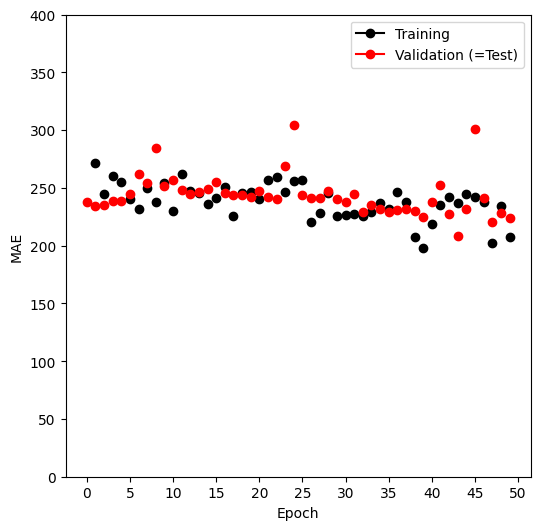

In [40]:
fig , ax = subplots(1, 1, figsize=(6, 6))
ax = summary_plot(hit_results ,
                  ax,
                  col='mae',
                  ylabel='MAE',
                  valid_legend='Validation (=Test)')
ax.set_ylim([0, 400])
ax.set_xticks(np.linspace(0, 50, 11).astype(int));

We can predict directly from the final model, and evaluate its performance on the test data. Before fitting, we call the `eval()` method of `hit_model`. This tells `torch` to effectively consider this model to be fitted, so that we can use it to predict on new data. For our model here, the biggest change is that the dropout layers will be turned off, i.e. no weights will be randomly dropped in predicting on new data.

In [41]:
hit_model.eval()
preds = hit_module(X_test_t)
torch.abs(Y_test_t - preds).mean()

tensor(224.2696, grad_fn=<MeanBackward0>)

#### Cleanup
In setting up our data module, we had initiated several worker processes that will remain running. We delete all references to the torch objects to ensure these processes will be killed.

In [42]:
del(Hitters ,hit_model , hit_dm ,hit_logger ,hit_test , hit_train ,X, Y,X_test , X_train ,Y_test , Y_train ,X_test_t , Y_test_t ,hit_trainer , hit_module)

## Multilayer Network on the MNIST Digit Data
The `torchvision` package comes with a number of example datasets, including the `MNIST` digit data. Our first step is to retrieve the training and test data sets; the `MNIST()` function within `torchvision.datasets` is provided for this purpose. The data will be downloaded the first time this function is executed, and stored in the directory `data/MNIST`.

In [43]:
(mnist_train ,mnist_test) = [MNIST(root='data',
                                   train=train ,
                                   download=True ,
                                   transform=ToTensor()) for train in [True , False]]
mnist_train

100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:08<00:00, 1.15MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 59.4kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.13MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<?, ?B/s]


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

There are 60,000 images in the training data and 10,000 in the test data. The images are 28 × 28, and stored as a matrix of pixels. We need to transform each one into a vector.<br> Neural networks are somewhat sensitive to the scale of the inputs, much as ridge and lasso regularization are affected by scaling. Here the inputs are eight-bit grayscale values between 0 and 255, so we rescale to the unit interval (Note: eight bits means $2^8$, which equals 256. Since the convention is to start at 0, the possible values range from 0 to 255.) This transformation, along with some reordering of the axes, is performed by the `ToTensor()` transform from the `torchvision.transforms` package.<br> As in our `Hitters` example, we form a data module from the training and test datasets, setting aside 20% of the training images for validation.

In [44]:
mnist_dm = SimpleDataModule(mnist_train ,
                            mnist_test ,
                            validation=0.2,
                            num_workers=max_num_workers ,
                            batch_size =256)

Let’s take a look at the data that will get fed into our network. We loop through the first few chunks of the test dataset, breaking after 2 batches:

In [45]:
for idx , (X_ ,Y_) in enumerate(mnist_dm.train_dataloader()):
    print('X: ', X_.shape)
    print('Y: ', Y_.shape)
    if idx >= 1:
        break

X:  torch.Size([256, 1, 28, 28])
Y:  torch.Size([256])
X:  torch.Size([256, 1, 28, 28])
Y:  torch.Size([256])


We see that the X for each batch consists of 256 images of size `1x28x28`. Here the `1` indicates a single channel (greyscale). For RGB images such as `CIFAR100` below, we will see that the `1` in the size will be replaced by `3` for the three RGB channels.<br> Now we are ready to specify our neural network.

In [46]:
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel , self).__init__()
        self.layer1 = nn.Sequential(nn.Flatten(),
                                    nn.Linear(28*28, 256),
                                    nn.ReLU(),
                                    nn.Dropout (0.4)
                                   )
        self.layer2 = nn.Sequential(nn.Linear(256, 128),
                                    nn.ReLU(),
                                    nn.Dropout (0.3)
                                   )
        self._forward = nn.Sequential(self.layer1 ,
                                      self.layer2 ,
                                      nn.Linear(128, 10))
    def forward(self , x):
        return self._forward(x)

We see that in the first layer, each `1x28x28` image is flattened, then mapped to 256 dimensions where we apply a ReLU activation with 40% dropout. A second layer maps the first layer’s output down to 128 dimensions, applying a ReLU activation with 30% dropout. Finally, the 128 dimensions are mapped down to 10, the number of classes in the `MNIST` data.

In [47]:
mnist_model = MNISTModel()

We can check that the model produces output of expected size based on our existing batch `X_` above.

In [48]:
mnist_model(X_).size()

torch.Size([256, 10])

Let’s take a look at the summary of the model. Instead of an `input_size` we can pass a tensor of correct shape. In this case, we pass through the final batched `X_` from above.

In [49]:
summary(mnist_model ,
        input_data=X_,
        col_names=['input_size',
                   'output_size',
                   'num_params']
       )

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
MNISTModel                               [256, 1, 28, 28]          [256, 10]                 --
├─Sequential: 1-1                        [256, 1, 28, 28]          [256, 10]                 --
│    └─Sequential: 2-1                   [256, 1, 28, 28]          [256, 256]                --
│    │    └─Flatten: 3-1                 [256, 1, 28, 28]          [256, 784]                --
│    │    └─Linear: 3-2                  [256, 784]                [256, 256]                200,960
│    │    └─ReLU: 3-3                    [256, 256]                [256, 256]                --
│    │    └─Dropout: 3-4                 [256, 256]                [256, 256]                --
│    └─Sequential: 2-2                   [256, 256]                [256, 128]                --
│    │    └─Linear: 3-5                  [256, 256]                [256, 128]                32,896
│    │    └─ReLU: 3-6     

Having set up both the model and the data module, fitting this model is now almost identical to the `Hitters` example. In contrast to our regression model, here we will use the `SimpleModule.classification()` method which uses the *cross-entropy loss function* instead of *mean squared error*.

In [56]:
# For MNIST, there are 10 classes (digits 0-9)
mnist_module = SimpleModule.classification(mnist_model, num_classes=10)
mnist_logger = CSVLogger('logs', name='MNIST')

Now we are ready to go. The final step is to supply training data, and fit the model.

In [57]:
mnist_trainer = Trainer(deterministic=True ,
                        max_epochs=30,
                        logger=mnist_logger ,
                        callbacks=[ErrorTracker()]
                       )
mnist_trainer.fit(mnist_module ,datamodule=mnist_dm)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | MNISTModel       | 235 K  | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
235 K     Trainable params
0         Non-trainable params
235 K     Total params
0.941     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=30` reached.


We have suppressed the output here, which is a progress report on the fitting of the model, grouped by epoch. This is very useful, since on large datasets fitting can take time. Fitting this model took 245 seconds on a MacBook Pro with an Apple M1 Pro chip with 10 cores and 16 GB of RAM. Here we specified a validation split of 20%, so training is actually performed on 80% of the 60,000 observations in the training set. This is an alternative to actually supplying validation data, like we did for the `Hitters` data. SGD uses batches of 256 observations in computing the gradient, and doing the arithmetic, we see that an epoch corresponds to 188 gradient steps.<br> `SimpleModule.classification()` includes an accuracy metric by default. Other classification metrics can be added from `torchmetrics`. We will use our `summary_plot()` function to display accuracy across epochs.

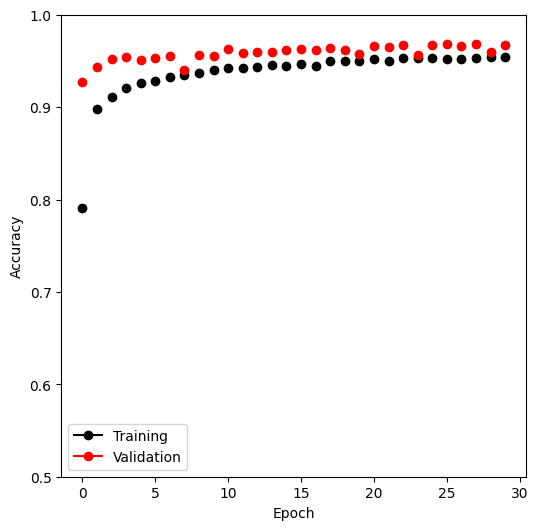

In [58]:
mnist_results = pd.read_csv(mnist_logger.experiment.metrics_file_path)
fig , ax = subplots(1, 1, figsize=(6, 6))
summary_plot(mnist_results ,
             ax,
             col='accuracy',
             ylabel='Accuracy'
            )
ax.set_ylim([0.5, 1])
ax.set_ylabel('Accuracy')
ax.set_xticks(np.linspace(0, 30, 7).astype(int));

Once again we evaluate the accuracy using the `test()` method of our trainer. This model achieves 97% accuracy on the test data.

In [59]:
mnist_trainer.test(mnist_module ,datamodule=mnist_dm)

Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9660999774932861     │
│         test_loss         │    0.17197057604789734    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.17197057604789734, 'test_accuracy': 0.9660999774932861}]

Table 10.1 also reports the error rates resulting from LDA (Chapter 4) and multiclass logistic regression. For LDA we refer the reader to Section 4.7.3. Although we could use the `sklearn` function `LogisticRegression()` to fit multiclass logistic regression, we are set up here to fit such a model with `torch`. We just have an input layer and an output layer, and omit the hidden layers!

In [69]:
class MNIST_MLR(nn.Module):
    def __init__(self):
        super(MNIST_MLR , self).__init__()
        self.linear = nn.Sequential(nn.Flatten(),
                                    nn.Linear(784, 10)
                                   )

    def forward(self , x):
        return self.linear(x)


mlr_model = MNIST_MLR()
mlr_module = SimpleModule.classification(mlr_model,num_classes=10)
mlr_logger = CSVLogger('logs', name='MNIST_MLR')

In [70]:
mlr_trainer = Trainer(deterministic=True ,
                      max_epochs=30,
                      callbacks=[ErrorTracker()]
                     )
mlr_trainer.fit(mlr_module , datamodule=mnist_dm)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | MNIST_MLR        | 7.9 K  | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.031     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=30` reached.


We fit the model just as before and compute the test results.

In [71]:
mlr_trainer.test(mlr_module ,
                 datamodule=mnist_dm
                )

Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9111999869346619     │
│         test_loss         │    0.3661313056945801     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.3661313056945801, 'test_accuracy': 0.9111999869346619}]

The accuracy is above 90% even for this pretty simple model.<br> As in the `Hitters` example, we delete some of the objects we created above.

In [72]:
del(mnist_test ,
    mnist_train ,
    mnist_model ,
    mnist_dm ,
    mnist_trainer ,
    mnist_module ,
    mnist_results ,
    mlr_model ,
    mlr_module ,
    mlr_trainer)

## Convolutional Neural Networks
In this section we fit a `CNN` to the `CIFAR100` data, which is available in the `torchvision` package. It is arranged in a similar fashion as the `MNIST` data.

In [44]:
(cifar_train ,cifar_test) = [CIFAR100(root="data",train=train ,download=True) for train in [True , False]]

In [45]:
transform = ToTensor()
cifar_train_X = torch.stack([transform(x) for x in cifar_train.data])
cifar_test_X = torch.stack([transform(x) for x in cifar_test.data])
cifar_train = TensorDataset(cifar_train_X ,torch.tensor(cifar_train.targets))
cifar_test = TensorDataset(cifar_test_X , torch.tensor(cifar_test.targets))

The `CIFAR100` dataset consists of 50,000 training images, each represented by a three-dimensional tensor: each three-color image is represented as a
set of three channels, each of which consists of 32×32 eight-bit pixels. We standardize as we did for the digits, but keep the array structure. This is
accomplished with the `ToTensor()` transform. <br>Creating the data module is similar to the `MNIST` example.

In [46]:
cifar_dm = SimpleDataModule(cifar_train ,
                            cifar_test ,
                            validation=0.2,
                            num_workers=max_num_workers ,
                            batch_size =128)

In [47]:
# We again look at the shape of typical batches in our data loaders.
for idx , (X_ ,Y_) in enumerate(cifar_dm.train_dataloader()):
    print('X: ', X_.shape)
    print('Y: ', Y_.shape)
    if idx >= 1:
        break

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\torch\utils\data\dataloader.py:626: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


X:  torch.Size([128, 3, 32, 32])
Y:  torch.Size([128])
X:  torch.Size([128, 3, 32, 32])
Y:  torch.Size([128])


Before we start, we look at some of the training images; similar code produced Figure 10.5 on page 406. The example below also illustrates that `TensorDataset` objects can be indexed with integers — we are choosing random images from the training data by indexing `cifar_train`. In order to display correctly, we must reorder the dimensions by a call to `np.transpose()`.

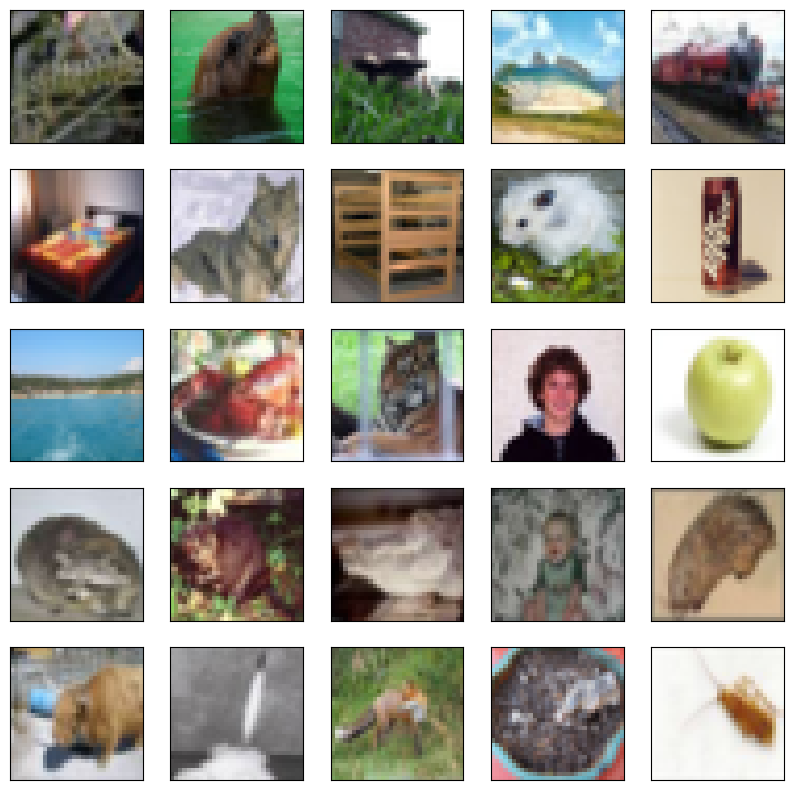

In [48]:
fig , axes = subplots(5, 5, figsize=(10,10))
rng = np.random.default_rng(4)
indices = rng.choice(np.arange(len(cifar_train)), 25,replace=False).reshape((5,5))
for i in range(5):
    for j in range(5):
        idx = indices[i,j]
        axes[i,j].imshow(np.transpose(cifar_train[idx][0],
                                      [1,2,0]),
                                      interpolation=None
                        )
        axes[i,j].set_xticks ([])
        axes[i,j].set_yticks ([])

Here the `imshow()` method recognizes from the shape of its argument that it is a 3-dimensional array, with the last dimension indexing the three RGB color channels.<br> We specify a moderately-sized CNN for demonstration purposes, similar in structure to Figure 10.8. We use several layers, each consisting of convolution, ReLU, and max-pooling steps. We first define a module that defines one of these layers. As in our previous examples, we overwrite the `__init__()` and `forward()` methods of `nn.Module`. This user-defined module can now be used in ways just like `nn.Linear()` or `nn.Dropout()`.

In [49]:
class BuildingBlock(nn.Module):
    def __init__(self ,in_channels ,out_channels):
        super(BuildingBlock , self).__init__()
        self.conv = nn.Conv2d(in_channels=in_channels ,
                              out_channels=out_channels ,
                              kernel_size=(3,3),
                              padding='same'
                             )
        self.activation = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(2,2))

    def forward(self , x):
        return self.pool(self.activation(self.conv(x)))

Notice that we used the `padding = "same"` argument to `nn.Conv2d()`, which ensures that the output channels have the same dimension as the input channels. There are 32 channels in the first hidden layer, in contrast to the three channels in the input layer. We use a 3 × 3 convolution filter for each channel in all the layers. Each convolution is followed by a max-pooling layer over 2 × 2 blocks.<br> In forming our deep learning model for the `CIFAR100` data, we use several of our `BuildingBlock()` modules sequentially. This simple example illustrates some of the power of `torch`. Users can define modules of their own, which can be combined in other modules. Ultimately, everything is fit by a generic trainer

In [50]:
class CIFARModel(nn.Module):
    def __init__(self):
        super(CIFARModel , self).__init__()
        sizes = [(3,32),
                 (32,64),
                 (64,128),
                 (128,256)
                ]
        self.conv = nn.Sequential(*[BuildingBlock(in_ , out_) for in_ , out_ in sizes])
        self.output = nn.Sequential(nn.Dropout (0.5),
                                    nn.Linear(2*2*256, 512),
                                    nn.ReLU(),
                                    nn.Linear(512, 100)
                                   )

    def forward(self , x):
        val = self.conv(x)
        val = torch.flatten(val , start_dim=1)
        return self.output(val)

We build the model and look at the summary. (We had created examples of `X_` earlier.)

In [51]:
cifar_model = CIFARModel()
summary(cifar_model ,
        input_data=X_,
        col_names=['input_size','output_size','num_params']
       )

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CIFARModel                               [128, 3, 32, 32]          [128, 100]                --
├─Sequential: 1-1                        [128, 3, 32, 32]          [128, 256, 2, 2]          --
│    └─BuildingBlock: 2-1                [128, 3, 32, 32]          [128, 32, 16, 16]         --
│    │    └─Conv2d: 3-1                  [128, 3, 32, 32]          [128, 32, 32, 32]         896
│    │    └─ReLU: 3-2                    [128, 32, 32, 32]         [128, 32, 32, 32]         --
│    │    └─MaxPool2d: 3-3               [128, 32, 32, 32]         [128, 32, 16, 16]         --
│    └─BuildingBlock: 2-2                [128, 32, 16, 16]         [128, 64, 8, 8]           --
│    │    └─Conv2d: 3-4                  [128, 32, 16, 16]         [128, 64, 16, 16]         18,496
│    │    └─ReLU: 3-5                    [128, 64, 16, 16]         [128, 64, 16, 16]         --
│    │    └─MaxPool2d: 3-6    

The total number of trainable parameters is 964,516. By studying the size of the parameters, we can see that the channels halve in both dimensions after each of these max-pooling operations. After the last of these we have a layer with 256 channels of dimension 2 × 2. These are then flattened to a dense layer of size 1,024; in other words, each of the 2 × 2 matrices is turned into a 4-vector, and put side-by-side in one layer. This is followed by a dropout regularization layer, then another dense layer of size 512, and finally, the output layer.<br> Up to now, we have been using a default optimizer in `SimpleModule()`. For these data, experiments show that a smaller learning rate performs better than the default 0.01. We use a custom optimizer here with a learning rate of 0.001. Besides this, the logging and training follow a similar pattern to our previous examples. The optimizer takes an argument `params` that informs the optimizer which parameters are involved in SGD (stochastic gradient descent).<br> We saw earlier that entries of a module’s parameters are tensors. In passing the parameters to the optimizer we are doing more than simply passing arrays; part of the structure of the graph is encoded in the tensors themselves.

In [52]:
cifar_optimizer = RMSprop(cifar_model.parameters(), lr=0.001)
cifar_module = SimpleModule.classification(cifar_model ,
                                           optimizer=cifar_optimizer,
                                           num_classes=100)
cifar_logger = CSVLogger('logs', name='CIFAR100')

In [53]:
cifar_trainer = Trainer(deterministic=True ,
                        max_epochs=30,
                        logger=cifar_logger ,
                        callbacks=[ErrorTracker()]
                       )
cifar_trainer.fit(cifar_module ,
                  datamodule=cifar_dm
                 )

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | CIFARModel       | 964 K  | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
964 K     Trainable params
0         Non-trainable params
964 K     Total params
3.858     Total estimated model params size (MB)
24        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=30` reached.


This model takes 10 minutes or more to run and achieves about 42% accuracy on the test data. Although this is not terrible for 100-class data (a random classifier gets 1% accuracy), searching the web we see results around 75%. Typically it takes a lot of architecture carpentry, fiddling with regularization, and time, to achieve such results. <br>Let’s take a look at the validation and training accuracy across epoch.

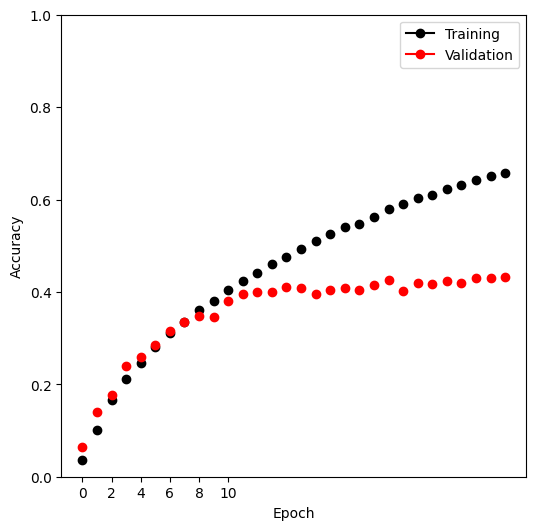

In [56]:
log_path = cifar_logger.experiment.metrics_file_path
cifar_results = pd.read_csv(log_path)
fig , ax = subplots(1, 1, figsize=(6, 6))
summary_plot(cifar_results ,
             ax,
             col='accuracy',
             ylabel='Accuracy'
            )
ax.set_xticks(np.linspace(0, 10, 6).astype(int))
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1]);

In [57]:
#Finally, we evaluate our model on our test data.
cifar_trainer.test(cifar_module ,
                   datamodule=cifar_dm
                  )

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\torch\utils\data\dataloader.py:626: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.4311000108718872     │
│         test_loss         │    2.4345498085021973     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 2.4345498085021973, 'test_accuracy': 0.4311000108718872}]

#### Hardware Acceleration
As deep learning has become ubiquitous in machine learning, hardware manufacturers have produced special libraries that can often speed up the
gradient-descent steps. <br> For instance, Mac OS devices with the M1 chip may have the Metal programming framework enabled, which can speed up the `torch` computations.We present an example of how to use this acceleration.<br>  The main changes are to the `Trainer()` call as well as to the metrics that will be evaluated on the data. These metrics must be told where the data will be located at evaluation time. This is accomplished with a call to the `to()` method of the metrics.

In [91]:
try:
    for name , metric in cifar_module.metrics.items():
        cifar_module.metrics[name] = metric.to('mps')
    cifar_trainer_mps = Trainer(accelerator='mps',
                                deterministic=True ,
                                max_epochs =30
                               )
    cifar_trainer_mps.fit(cifar_module ,
                          datamodule=cifar_dm
                         )
    cifar_trainer_mps.test(cifar_module ,
                           datamodule=cifar_dm
                          )
except:
    pass

This yields approximately two- or three-fold acceleration for each epoch. We have protected this code block using `try:` and `except:` clauses; if it works, we get the speedup, if it fails, nothing happens.

## Using Pretrained CNN Models
We now show how to use a CNN pretrained on the `imagenet` database to classify natural images, and demonstrate how we produced Figure 10.10. We copied six JPEG images from a digital photo album into the directory book_images. These images are available from the data section of [here](www.statlearning.com), the ISLP book website. Download `book_images.zip`; when clicked it creates the `book_images` directory.<br> The pretrained network we use is called `resnet50`; specification details can be found on the web. We will read in the images, and convert them into the array format expected by the `torch` software to match the specifications in `resnet50`. The conversion involves a resize, a crop and then a predefined standardization for each of the three channels. We now read in the images and preprocess them.

In [34]:
resize = Resize ((232,232))
crop = CenterCrop (224)
normalize = Normalize ([0.485,0.456,0.406],[0.229 ,0.224 ,0.225])
imgfiles = sorted([f for f in glob('book_images/*')])
imgs = torch.stack([torch.div(crop(resize(read_image(f))), 255) for f in imgfiles])
imgs = normalize(imgs)
imgs.size()

torch.Size([6, 3, 224, 224])

We now set up the trained network with the weights we read in code block 6. The model has 50 layers, with a fair bit of complexity.

In [35]:
resnet_model = resnet50(weights=ResNet50_Weights.DEFAULT)
summary(resnet_model ,
        input_data=imgs ,
        col_names=['input_size','output_size','num_params']
       )

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
ResNet                                   [6, 3, 224, 224]          [6, 1000]                 --
├─Conv2d: 1-1                            [6, 3, 224, 224]          [6, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [6, 64, 112, 112]         [6, 64, 112, 112]         128
├─ReLU: 1-3                              [6, 64, 112, 112]         [6, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [6, 64, 112, 112]         [6, 64, 56, 56]           --
├─Sequential: 1-5                        [6, 64, 56, 56]           [6, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [6, 64, 56, 56]           [6, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [6, 64, 56, 56]           [6, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [6, 64, 56, 56]           [6, 64, 56, 56]           128
│    │    └─ReLU: 3-3      

We set the mode to `eval()` to ensure that the model is ready to predict on new data.

In [36]:
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Inspecting the output above, we see that when setting up the `resnet_model`, the authors defined a `Bottleneck`, much like our `BuildingBlock` module.<br> We now feed our six images through the fitted network.

In [37]:
img_preds = resnet_model(imgs)

Let’s look at the predicted probabilities for each of the top 3 choices. First we compute the probabilities by applying the *softmax* to the *logits* in `img_preds`. Note that we have had to call the `detach()` method on the tensor `img_preds` in order to convert it to our a more familiar `ndarray`.

In [38]:
img_probs = np.exp(np.asarray(img_preds.detach()))
img_probs /= img_probs.sum(1)[:,None]

In order to see the class labels, we must download the index file associated with `imagenet` and this is avalable from the book website and [here](s3.amazonaws.com/deep-learningmodels/image-models/imagenet_class_index.json).

In [40]:
labs = json.load(open('Imgs/imagenet_class_index.json'))
class_labels = pd.DataFrame([(int(k), v[1]) for k, v in labs.items()],
                            columns=['idx', 'label']
                           )
class_labels = class_labels.set_index('idx')
class_labels = class_labels.sort_index()

We’ll now construct a data frame for each image file with the labels with the three highest probabilities as estimated by the model above.

In [41]:
for i, imgfile in enumerate(imgfiles):
    img_df = class_labels.copy()
    img_df['prob'] = img_probs[i]
    img_df = img_df.sort_values(by='prob', ascending=False)[:3]
    print(f'Image: {imgfile}')
    print(img_df.reset_index().drop(columns=['idx']))

Image: book_images\Cape_Weaver.jpg
      label      prob
0   jacamar  0.297500
1     macaw  0.068107
2  lorikeet  0.051104
Image: book_images\Flamingo.jpg
            label      prob
0        flamingo  0.609514
1       spoonbill  0.013586
2  American_egret  0.002132
Image: book_images\Hawk_Fountain.jpg
            label      prob
0            kite  0.184717
1           robin  0.084018
2  great_grey_owl  0.061267
Image: book_images\Hawk_cropped.jpg
            label      prob
0            kite  0.453834
1  great_grey_owl  0.015914
2             jay  0.012210
Image: book_images\Lhasa_Apso.jpg
             label      prob
0            Lhasa  0.260316
1         Shih-Tzu  0.097196
2  Tibetan_terrier  0.032820
Image: book_images\Sleeping_Cat.jpg
         label      prob
0  Persian_cat  0.163069
1        tabby  0.074143
2    tiger_cat  0.042578


We see that the model is quite confident about `Flamingo.jpg`, but a little less so for the other images. <br> We end this section with our usual cleanup.

In [ ]:
del(cifar_test ,
    cifar_train ,
    cifar_dm ,
    cifar_module ,
    cifar_logger ,
    cifar_optimizer ,
    cifar_trainer
   )

### IMDB Document Classification
We now implement models for sentiment classification (Section 10.4) on the `IMDB` dataset. As mentioned above code block 8, we are using a preprocessed version of the `IMDB` dataset found in the `keras` package. As `keras` uses `tensorflow`, a different tensor and deep learning library, we have converted the data to be suitable for `torch`. The code used to convert from `keras` is available in the module `ISLP.torch._make_imdb`. It requires some of the `keras` packages to run. These data use a dictionary of size 10,000.<br> We have stored three different representations of the review data for this lab:
* `load_tensor()`, a sparse tensor version usable by `torch`;
* `load_sparse()`, a sparse matrix version usable by `sklearn`, since we will compare with a lasso fit;
* `load_sequential()`, a padded version of the original sequence representation, limited to the last 500 words of each review.

In [100]:
(imdb_seq_train ,imdb_seq_test) = load_sequential(root='data/IMDB')
padded_sample = np.asarray(imdb_seq_train.tensors [0][0])
sample_review = padded_sample[padded_sample > 0][:12]
sample_review [:12]

Retrieving "IMDB_S_train.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_S_test.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_Y_test.npy" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_Y_train.npy" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468])

The datasets `imdb_seq_train` and `imdb_seq_test` are both instances of the class `TensorDataset`. The tensors used to construct them can be found in the `tensors` attribute, with the first tensor the features `X` and the second the outcome `Y`. We have taken the first row of features and stored it as `padded_sample`. In the preprocessing used to form these data, sequences were padded with 0s in the beginning if they were not long enough, hence we remove this padding by restricting to entries where `padded_sample > 0`. We then provide the first 12 words of the sample review.<br> We can find these words in the `lookup` dictionary from the `ISLP.torch.imdb` module.

In [101]:
lookup = load_lookup(root='data/IMDB')
' '.join(lookup[i] for i in sample_review)

Retrieving "IMDB_word_index.pkl" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


"<START> this film was just brilliant casting location scenery story direction everyone's"

For our first model, we have created a binary feature for each of the 10,000 possible words in the dataset, with an entry of one in the $i$, $j$ entry if word $j$ appears in review $i$. As most reviews are quite short, such a feature matrix has over 98% zeros. These data are accessed using `load_tensor()` from the `ISLP` library.

In [24]:
max_num_workers =10
(imdb_train ,imdb_test) = load_tensor(root='data/IMDB')
imdb_dm = SimpleDataModule(imdb_train ,
                           imdb_test ,
                           validation=2000,
                           num_workers=min(6, max_num_workers),
                           batch_size =512
                          )

We’ll use a two-layer model for our first model.

In [103]:
class IMDBModel(nn.Module):

    def __init__(self , input_size):
        super(IMDBModel , self).__init__()
        self.dense1 = nn.Linear(input_size , 16)
        self.activation = nn.ReLU()
        self.dense2 = nn.Linear(16, 16)
        self.output = nn.Linear(16, 1)

    def forward(self , x):
        val = x
        for _map in [self.dense1 ,self.activation ,self.dense2 ,self.activation ,self.output]:
            val = _map(val)
        return torch.flatten(val)

In [104]:
# We now instantiate our model and look at a summary (not shown).
imdb_model = IMDBModel(imdb_test.tensors[0].size()[1])
summary(imdb_model ,
        input_size=imdb_test.tensors[0].size(),
        col_names=['input_size','output_size','num_params']
       )

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
IMDBModel                                [25000, 10003]            [25000]                   --
├─Linear: 1-1                            [25000, 10003]            [25000, 16]               160,064
├─ReLU: 1-2                              [25000, 16]               [25000, 16]               --
├─Linear: 1-3                            [25000, 16]               [25000, 16]               272
├─ReLU: 1-4                              [25000, 16]               [25000, 16]               --
├─Linear: 1-5                            [25000, 16]               [25000, 1]                17
Total params: 160,353
Trainable params: 160,353
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 4.01
Input size (MB): 1000.30
Forward/backward pass size (MB): 6.60
Params size (MB): 0.64
Estimated Total Size (MB): 1007.54

We’ll again use a smaller learning rate for these data, hence we pass an `optimizer` to the `SimpleModule`. Since the reviews are classified into positive or negative sentiment, we use `SimpleModule.binary_classification()`.Our use of `binary_classification()` instead of `classification()` is due to some subtlety in how `torchmetrics.Accuracy()` works, as well as the data type of the targets.

In [105]:
imdb_optimizer = RMSprop(imdb_model.parameters(), lr=0.001)
imdb_module = SimpleModule.binary_classification(imdb_model ,
                                                 optimizer=imdb_optimizer
                                                )

Having loaded the datasets into a data module and created a `SimpleModule`, the remaining steps are familiar.

In [106]:
imdb_logger = CSVLogger('logs', name='IMDB')
imdb_trainer = Trainer(deterministic=True ,
                       max_epochs=30,
                       logger=imdb_logger ,
                       callbacks=[ErrorTracker()]
                      )
imdb_trainer.fit(imdb_module ,
                 datamodule=imdb_dm
                )

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 160 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.641     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (45) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=30` reached.


In [107]:
# Evaluating the test error yields roughly 86% accuracy.
test_results = imdb_trainer.test(imdb_module , datamodule=imdb_dm)
test_results

Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8474400043487549     │
│         test_loss         │    0.9688525199890137     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.9688525199890137, 'test_accuracy': 0.8474400043487549}]

#### Comparison to Lasso
We now fit a lasso logistic regression model using `LogisticRegression()` from `sklearn`. Since `sklearn` does not recognize the sparse tensors of `torch`, we use a sparse matrix that is recognized by `sklearn`.

In [108]:
((X_train , Y_train),(X_valid , Y_valid),(X_test , Y_test)) = load_sparse(validation=2000,
                                                                          random_state=0,
                                                                          root='data/IMDB'
                                                                         )

Retrieving "IMDB_X_test.npz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_X_train.npz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


Similar to what we did before, we construct a series of 50 values for the lasso reguralization parameter $\lambda$.

In [109]:
lam_max = np.abs(X_train.T * (Y_train - Y_train.mean())).max()
lam_val = lam_max * np.exp(np.linspace(np.log(1),np.log(1e-4), 50))

With `LogisticRegression()` the regularization parameter $C$ is specified as the inverse of $\lambda$. There are several solvers for logistic regression; here we use `liblinear` which works well with the sparse input format.

In [110]:
logit = LogisticRegression(penalty='l1',
                           C=1/lam_max ,
                           solver='liblinear',
                           warm_start=True ,
                           fit_intercept=True
                          )

In [111]:
# The path of 50 values takes approximately 40 seconds to run.
coefs = []
intercepts = []

for l in lam_val:
    logit.C = 1/l
    logit.fit(X_train , Y_train)
    coefs.append(logit.coef_.copy())
    intercepts.append(logit.intercept_)

The coefficient and intercepts have an extraneous dimension which can be removed by the `np.squeeze()` function.

In [112]:
coefs = np.squeeze(coefs)
intercepts = np.squeeze(intercepts)

We’ll now make a plot to compare our neural network results with the lasso.

%%capture
fig , axes = subplots(1, 2, figsize=(16, 8), sharey=True)
for ((X_, Y_),data_ ,color) in zip([(X_train , Y_train),
                                    (X_valid , Y_valid),
                                    (X_test , Y_test)],
                                   ['Training', 'Validation', 'Test'],
                                   ['black', 'red', 'blue']):
    linpred_ = X_ * coefs.T + intercepts[None ,:]
    label_ = np.array(linpred_ > 0)
    accuracy_ = np.array([np.mean(Y_ == l) for l in label_.T])
    axes[0].plot(-np.log(lam_val / X_train.shape[0]),
                 accuracy_ ,
                 '.--',
                 color=color ,
                 markersize=13,
                 linewidth=2,
                 label=data_
                )

axes[0].legend()
axes[0]. set_xlabel(r'$-\log(\lambda)$', fontsize=20)
axes[0]. set_ylabel('Accuracy', fontsize=20)

Notice the use of `%%capture`, which suppresses the displaying of the partially completed figure. This is useful when making a complex figure, since the steps can be spread across two or more cells. We now add a plot of the lasso accuracy, and display the composed figure by simply entering its name at the end of the cell.

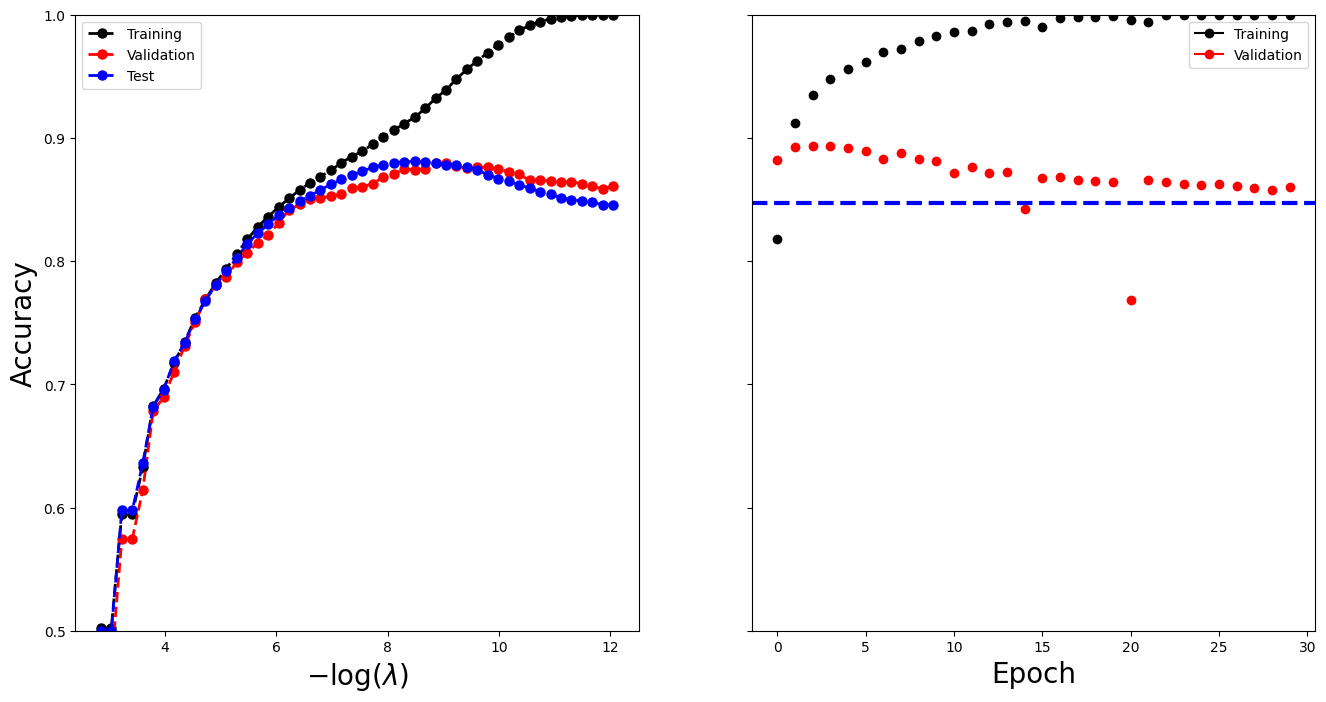

In [114]:
imdb_results = pd.read_csv(imdb_logger.experiment.metrics_file_path)
summary_plot(imdb_results ,
             axes[1],
             col='accuracy',
             ylabel='Accuracy'
            )
axes[1]. set_xticks(np.linspace(0, 30, 7).astype(int))
axes[1]. set_ylabel('Accuracy', fontsize=20)
axes[1]. set_xlabel('Epoch', fontsize=20)
axes[1]. set_ylim([0.5, 1]);
axes[1].axhline(test_results [0]['test_accuracy'],
                color='blue',
                linestyle='--',
                linewidth=3)
fig

From the graphs we see that the accuracy of the lasso logistic regression peaks at about 0.88, as it does for the neural network.<br> Once again, we end with a cleanup.

In [115]:
del(imdb_model ,imdb_trainer ,imdb_logger ,imdb_dm ,imdb_train ,imdb_test)

## Recurrent Neural Networks
### Sequential Models for Document Classification
Here we fit a simple LSTM RNN for sentiment prediction to the `IMDb` movie-review data. For an RNN we use the sequence of words in a document, taking their order into account. We loaded the preprocessed data at the beginning of Section 10.9.5. A script that details the preprocessing can be found in the `ISLP` library. Notably, since more than 90% of the documents had fewer than 500 words, we set the document length to 500. For longer documents, we used the last 500 words, and for shorter documents, we padded the front with blanks.

In [116]:
imdb_seq_dm = SimpleDataModule(imdb_seq_train ,
                               imdb_seq_test ,
                               validation=2000,
                               batch_size=300,
                               num_workers=min(6, max_num_workers)
                              )

The first layer of the RNN is an embedding layer of size 32, which will be learned during training. This layer one-hot encodes each document as a matrix of dimension 500×10, 003, and then maps these 10, 003 dimensions down to 32 (The extra 3 dimensions correspond to commonly occurring non-word entries in the reviews). Since each word is represented by an integer, this is effectively achieved by the creation of an embedding matrix of size 10, 003 × 32; each of the 500 integers in the document are then mapped to the appropriate 32 real numbers by indexing the appropriate rows of this matrix.<br> The second layer is an LSTM with 32 units, and the output layer is a single logit for the binary classification task. In the last line of the `forward()` method below, we take the last 32-dimensional output of the LSTM and map it to our response.

In [117]:
class LSTMModel(nn.Module):
    def __init__(self , input_size):
        super(LSTMModel , self).__init__()
        self.embedding = nn.Embedding(input_size , 32)
        self.lstm = nn.LSTM(input_size=32,
                            hidden_size=32,
                            batch_first=True
                           )
        self.dense = nn.Linear(32, 1)

    def forward(self , x):
        val , (h_n , c_n) = self.lstm(self.embedding(x))
        return torch.flatten(self.dense(val[:,-1]))

We instantiate and take a look at the summary of the model, using the first 10 documents in the corpus.

In [118]:
lstm_model = LSTMModel(X_test.shape[-1])
summary(lstm_model ,
        input_data=imdb_seq_train.tensors [0][:10],
        col_names=['input_size','output_size','num_params']
       )

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
LSTMModel                                [10, 500]                 [10]                      --
├─Embedding: 1-1                         [10, 500]                 [10, 500, 32]             320,096
├─LSTM: 1-2                              [10, 500, 32]             [10, 500, 32]             8,448
├─Linear: 1-3                            [10, 32]                  [10, 1]                   33
Total params: 328,577
Trainable params: 328,577
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 45.44
Input size (MB): 50.00
Forward/backward pass size (MB): 2.56
Params size (MB): 1.31
Estimated Total Size (MB): 53.87

The 10,003 is suppressed in the summary, but we see it in the parameter count, since 10, 003 × 32 = 320, 096.

In [119]:
lstm_module = SimpleModule.binary_classification(lstm_model)
lstm_logger = CSVLogger('logs', name='IMDB_LSTM')

In [120]:
lstm_trainer = Trainer(deterministic=True ,
                       max_epochs=20,
                       logger=lstm_logger ,
                       callbacks=[ErrorTracker()]
                      )

lstm_trainer.fit(lstm_module ,
                 datamodule=imdb_seq_dm
                )

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | LSTMModel         | 328 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
328 K     Trainable params
0         Non-trainable params
328 K     Total params
1.314     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=20` reached.


The rest is now similar to other networks we have fit. We track the test performance as the network is fit, and see that it attains 85% accuracy.

In [121]:
lstm_trainer.test(lstm_module , datamodule=imdb_seq_dm)

Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8553199768066406     │
│         test_loss         │    0.8090588450431824     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.8090588450431824, 'test_accuracy': 0.8553199768066406}]

(0.5, 1.0)

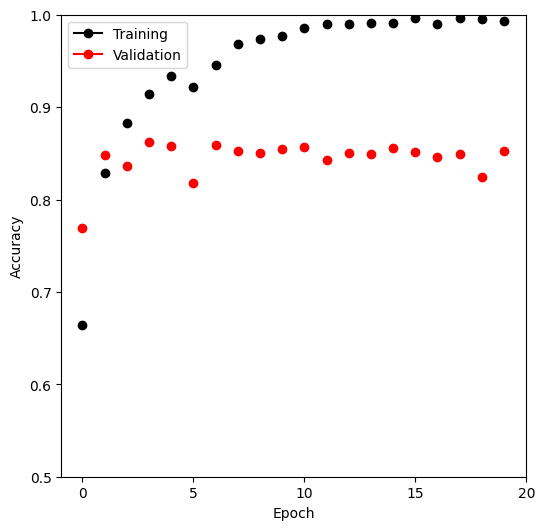

In [122]:
# We once again show the learning progress, followed by cleanup
lstm_results = pd.read_csv(lstm_logger.experiment.metrics_file_path)
fig , ax = subplots(1, 1, figsize=(6, 6))
summary_plot(lstm_results ,
             ax,
             col='accuracy',
             ylabel='Accuracy'
            )
ax.set_xticks(np.linspace(0, 20, 5).astype(int))
ax.set_ylabel('Accuracy')
ax.set_ylim([0.5, 1])

In [123]:
del(lstm_model ,lstm_trainer ,lstm_logger ,imdb_seq_dm ,imdb_seq_train ,imdb_seq_test)

#### Time Series Prediction
We now show how to fit the models in Section 10.5.2 for time series prediction. We first load and standardize the data

In [12]:
NYSE = load_data('NYSE')
cols = ['DJ_return', 'log_volume', 'log_volatility']
X = pd.DataFrame(StandardScaler(with_mean=True ,with_std=True).fit_transform(NYSE[cols]),
                 columns=NYSE[cols].columns ,
                 index=NYSE.index
                )

Next we set up the lagged versions of the data, dropping any rows with missing values using the `dropna()` method.

In [13]:
for lag in range(1, 6):
    for col in cols:
        newcol = np.zeros(X.shape[0]) * np.nan
        newcol[lag:] = X[col].values[:-lag]
        X.insert(len(X.columns), "{0}_{1}".format(col , lag), newcol)

X.insert(len(X.columns), 'train', NYSE['train'])
X = X.dropna()

Finally, we extract the response, training indicator, and drop the current day’s `DJ_return` and `log_volatility` to predict only from previous day’s data.

In [14]:
Y, train = X['log_volume'], X['train']
X = X.drop(columns=['train'] + cols)
X.columns

Index(['DJ_return_1', 'log_volume_1', 'log_volatility_1', 'DJ_return_2',
       'log_volume_2', 'log_volatility_2', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_4', 'log_volume_4', 'log_volatility_4',
       'DJ_return_5', 'log_volume_5', 'log_volatility_5'],
      dtype='object')

We first fit a simple linear model and compute the $R^2$ on the test data using the `score()` method.

In [15]:
M = LinearRegression()
M.fit(X[train], Y[train])
M.score(X[~train], Y[~train])

0.41289129385625223

We refit this model, including the factor variable `day_of_week`. For a categorical series in `pandas`, we can form the indicators using the `get_dummies()` method.

In [16]:
X_day = pd.merge(X,
                 pd.get_dummies(NYSE['day_of_week']),
                 on='date'
                )

Note that we do not have to reinstantiate the linear regression model as its `fit()` method accepts a design matrix and a response directly.

In [17]:
M.fit(X_day[train], Y[train])
M.score(X_day[~train], Y[~train])

0.45955631330532754

This model achieves an $R^2$ of about 46%. <br>To fit the RNN, we must reshape the data, as it will expect 5 lagged versions of each feature as indicated by the `input_shape` argument to the layer `nn.RNN()` below. We first ensure the columns of our data frame are such that a reshaped matrix will have the variables correctly lagged. We use the `reindex()` method to do this.<br> For an input shape `(5,3)`, each row represents a lagged version of the three variables. The `nn.RNN()` layer also expects the first row of each observation to be earliest in time, so we must reverse the current order. Hence we loop over `range(5,0,-1)` below, which is an example of using a `slice()` to index iterable objects. The general notation is `start:end:step`.

In [18]:
ordered_cols = []
for lag in range(5,0,-1):
    for col in cols:
        ordered_cols.append('{0}_{1}'.format(col , lag))

X = X.reindex(columns=ordered_cols)
X.columns

Index(['DJ_return_5', 'log_volume_5', 'log_volatility_5', 'DJ_return_4',
       'log_volume_4', 'log_volatility_4', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_2', 'log_volume_2', 'log_volatility_2',
       'DJ_return_1', 'log_volume_1', 'log_volatility_1'],
      dtype='object')

In [19]:
# We now reshape the data.
X_rnn = X.to_numpy().reshape((-1,5,3))
X_rnn.shape

(6046, 5, 3)

By specifying the first size as -1, `numpy.reshape()` deduces its size based on the remaining arguments.<br> Now we are ready to proceed with the RNN, which uses 12 hidden units, and 10% dropout. After passing through the RNN, we extract the final time point as `val[:,-1]` in `forward()` below. This gets passed through a 10% dropout and then flattened through a linear layer.

In [20]:
class NYSEModel(nn.Module):
    def __init__(self):
        super(NYSEModel , self).__init__()
        self.rnn = nn.RNN(3,
                          12,
                          batch_first=True
                         )
        self.dense = nn.Linear(12, 1)
        self.dropout = nn.Dropout (0.1)

    def forward(self , x):
        val , h_n = self.rnn(x)
        val = self.dense(self.dropout(val[:,-1]))
        return torch.flatten(val)

nyse_model = NYSEModel()

We fit the model in a similar fashion to previous networks. We supply the `fit` function with test data as validation data, so that when we monitor its progress and plot the history function we can see the progress on the test data. Of course we should not use this as a basis for early stopping, since then the test performance would be biased. <br>We form the training dataset similar to our `Hitters` example.

In [21]:
datasets = []
for mask in [train , ~train]:
    X_rnn_t = torch.tensor(X_rnn[mask].astype(np.float32))
    Y_t = torch.tensor(Y[mask].astype(np.float32))
    datasets.append(TensorDataset(X_rnn_t , Y_t))

nyse_train , nyse_test = datasets

C:\Users\vijay\AppData\Local\Temp\ipykernel_37796\2386118691.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_t = torch.tensor(Y[mask].astype(np.float32))
C:\Users\vijay\AppData\Local\Temp\ipykernel_37796\2386118691.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_t = torch.tensor(Y[mask].astype(np.float32))


In [22]:
# Following our usual pattern, we inspect the summary.
summary(nyse_model ,
        input_data=X_rnn_t ,
        col_names=['input_size','output_size','num_params']
       )


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
NYSEModel                                [1770, 5, 3]              [1770]                    --
├─RNN: 1-1                               [1770, 5, 3]              [1770, 5, 12]             204
├─Dropout: 1-2                           [1770, 12]                [1770, 12]                --
├─Linear: 1-3                            [1770, 12]                [1770, 1]                 13
Total params: 217
Trainable params: 217
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.83
Input size (MB): 0.11
Forward/backward pass size (MB): 0.86
Params size (MB): 0.00
Estimated Total Size (MB): 0.97

In [25]:
# We again put the two datasets into a data module, with a batch size of 64.
nyse_dm = SimpleDataModule(nyse_train ,
                           nyse_test ,
                           num_workers=min(4, max_num_workers),
                           validation=nyse_test ,
                           batch_size =64
                          )

In [26]:
# We run some data through our model to be sure the sizes match up correctly.
for idx , (x, y) in enumerate(nyse_dm.train_dataloader()):
    out = nyse_model(x)
    print(y.size(), out.size())
    if idx >= 2:
        break

torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])


We follow our previous example for setting up a trainer for a regression problem, requesting the $R^2$ metric to be be computed at each epoch.

In [27]:
nyse_optimizer = RMSprop(nyse_model.parameters(),
                         lr=0.001
                        )
nyse_module = SimpleModule.regression(nyse_model ,
                                      optimizer=nyse_optimizer ,
                                      metrics={'r2':R2Score()}
                                      )

Fitting the model should by now be familiar. The results on the test data are very similar to the linear AR model.

In [28]:
nyse_trainer = Trainer(deterministic=True ,
                       max_epochs=200,
                       callbacks=[ErrorTracker()]
                      )
nyse_trainer.fit(nyse_module ,
                 datamodule=nyse_dm
                )
nyse_trainer.test(nyse_module ,
                  datamodule=nyse_dm
                 )

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\vijay\project\ISLP\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type      | Params | Mode 
--------------------------------------------
0 | model | NYSEModel | 217    | train
1 | loss  | MSELoss   | 0      | train
--------------------------------

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=200` reached.


Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6167750954627991     │
│          test_r2          │    0.4146503210067749     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6167750954627991, 'test_r2': 0.4146503210067749}]

We could also fit a model without the `nn.RNN()` layer by just using a `nn.Flatten()` layer instead. This would be a nonlinear AR model. If in addition we excluded the hidden layer, this would be equivalent to our earlier linear AR model.<br>Instead we will fit a nonlinear AR model using the feature set `X_day` that includes the `day_of_week` indicators. To do so, we must first create our test and training datasets and a corresponding data module. This may seem a little burdensome, but is part of the general pipeline for `torch`.

In [29]:
datasets = []
for mask in [train , ~train]:
    X_day_t = torch.tensor(np.asarray(X_day[mask]).astype(np.float32))
    Y_t = torch.tensor(np.asarray(Y[mask]).astype(np.float32))
    datasets.append(TensorDataset(X_day_t , Y_t))

day_train , day_test = datasets

In [30]:
# Creating a data module follows a familiar pattern.
max_num_workers=10
day_dm = SimpleDataModule(day_train ,
                          day_test ,
                          num_workers=min(4, max_num_workers),
                          validation=day_test ,
                          batch_size =64)

We build a `NonLinearARModel()` that takes as input the 20 features and a hidden layer with 32 units. The remaining steps are familiar.

In [31]:
class NonLinearARModel(nn.Module):
    def __init__(self):
        super(NonLinearARModel , self).__init__()
        self._forward = nn.Sequential(nn.Flatten(),
                                      nn.Linear(20, 32),
                                      nn.ReLU(),
                                      nn.Dropout (0.5),
                                      nn.Linear(32, 1)
                                     )
    def forward(self , x):
        return torch.flatten(self._forward(x))

In [32]:
nl_model = NonLinearARModel()
nl_optimizer = RMSprop(nl_model.parameters(),
                       lr=0.001
                      )
nl_module = SimpleModule.regression(nl_model ,
                                    optimizer=nl_optimizer ,
                                    metrics={'r2':R2Score()}
                                   )

We continue with the usual training steps, fit the model, and evaluate the test error. We see the test $R^2$ is a slight improvement over the linear AR model that also includes `day_of_week`.

In [33]:
nl_trainer = Trainer(deterministic=True ,
                     max_epochs=20,
                     callbacks=[ErrorTracker()]
                    )
nl_trainer.fit(nl_module , 
               datamodule=day_dm
              )
nl_trainer.test(nl_module , 
                datamodule=day_dm
               )

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | NonLinearARModel | 705    | train
1 | loss  | MSELoss          | 0      | train
---------------------------------------------------
705       Trainable params
0         Non-trainable params
705       Total params
0.003     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=20` reached.


Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.5627228021621704     │
│          test_r2          │    0.46594858169555664    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5627228021621704, 'test_r2': 0.46594858169555664}]